In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV

In [12]:
df = pd.read_excel("uploaded_excel_file_2024-05-13.xlsx")

In [13]:
df.head()

,Line,Call Date,Object ID,Phase_LE (Reporting),Progress,Ticket Number,Caller name,Site (Caller),Ticket Type,Status,...,Supplier Service,Telephone number (Caller),This ticket has a conversation in Worcade.,Time spent for First line,Time spent for Second Line,Total Costs,Total costs,Training topic brief description (Training need),Urgency,Visible to
0,Second line ticket,2023-03-01 13:57:00,12 - DFDS Stevedoring A/S,Live,Closed,D365-2303004,tester,TOPdesk system,Request,Closed,...,NaN,NaN,False,00:00:00,00:00:00,0,0,NaN,Partially able to work,False
1,Second line ticket,2023-03-02 13:51:00,23456789 - DFDS Logistics A/S,NaN,Closed,D365-2303009,Adelina Zych,DFDS,Incident,Closed,...,NaN,NaN,False,00:00:00,00:00:00,0,0,NaN,Able to work,False
2,Second line ticket,2023-03-31 14:10:01,NaN,NaN,Closed,D365-2303029,Aleyna Ak,DFDS,Incident,Closed,...,NaN,NaN,False,00:00:00,00:00:00,0,0,NaN,Able to work,False
3,Second line ticket,2023-03-31 15:26:16,NaN,NaN,Closed,D365-2303034,Adelina Zych,DFDS,Request,Closed,...,NaN,NaN,False,00:00:00,00:00:00,0,0,NaN,NaN,False
4,Second line ticket,2023-03-31 16:59:58,NaN,NaN,Closed,D365-2303036,Eda Önal,DFDS,Request,Closed,...,NaN,NaN,False,00:00:00,00:00:00,0,0,NaN,NaN,False


In [14]:
df[['Call Date','Completion Date','Closure Date',"'In progress' duration"]]

,Call Date,Completion Date,Closure Date,'In progress' duration
0,2023-03-01 13:57:00,2023-05-25 12:30:00,2023-05-25 12:30:00,1900-01-10 18:45:00
1,2023-03-02 13:51:00,2023-04-18 07:59:53,2023-04-18 07:59:53,1900-01-09 06:38:00
2,2023-03-31 14:10:01,2023-04-05 09:49:00,2023-04-05 09:49:00,1900-01-01 00:09:00
3,2023-03-31 15:26:16,2023-04-18 07:59:53,2023-04-18 07:59:53,1900-01-04 10:34:00
4,2023-03-31 16:59:58,2023-04-17 10:24:57,2023-04-20 10:25:57,1900-01-04 01:55:00
...,...,...,...,...
16938,2024-05-13 15:22:29,NaT,NaT,00:00:00
16939,2024-05-13 15:26:00,NaT,NaT,00:00:00
16940,2024-05-13 15:31:08,NaT,NaT,00:00:00
16941,2024-05-13 15:34:08,NaT,NaT,00:00:00


In [15]:
rtp_df = df[['Priority','Category','Subcategory','Ticket Type','Call Date']].copy()

In [16]:
rtp_df.head()

,Priority,Category,Subcategory,Ticket Type,Call Date
0,2,User Management,Add/delete users,Request,2023-03-01 13:57:00
1,P6,NaN,NaN,Incident,2023-03-02 13:51:00
2,P6,Accounts Payable (PtP),Lasernet connection,Incident,2023-03-31 14:10:01
3,3,User Management,Add/delete users,Request,2023-03-31 15:26:16
4,3,User Management,Add/delete users,Request,2023-03-31 16:59:58


In [17]:
rtp_df['Call Date'] = pd.to_datetime(rtp_df['Call Date'])

In [18]:
rtp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16943 entries, 0 to 16942
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Priority     16935 non-null  object        
 1   Category     16932 non-null  object        
 2   Subcategory  16790 non-null  object        
 3   Ticket Type  16943 non-null  object        
 4   Call Date    16943 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 662.0+ KB


In [21]:
rtp_df['year'] = rtp_df['Call Date'].dt.year
rtp_df['week_no'] = rtp_df['Call Date'].dt.isocalendar().week  # this is for calculating the week number.

In [22]:
rtp_df.head()

,Priority,Category,Subcategory,Ticket Type,Call Date,year,week_no
0,2,User Management,Add/delete users,Request,2023-03-01 13:57:00,2023,9
1,P6,NaN,NaN,Incident,2023-03-02 13:51:00,2023,9
2,P6,Accounts Payable (PtP),Lasernet connection,Incident,2023-03-31 14:10:01,2023,13
3,3,User Management,Add/delete users,Request,2023-03-31 15:26:16,2023,13
4,3,User Management,Add/delete users,Request,2023-03-31 16:59:58,2023,13


In [23]:
rtp_df['Completion Date'] = df['Completion Date'].copy()

In [24]:
rtp_df.head()

,Priority,Category,Subcategory,Ticket Type,Call Date,year,week_no,Completion Date
0,2,User Management,Add/delete users,Request,2023-03-01 13:57:00,2023,9,2023-05-25 12:30:00
1,P6,NaN,NaN,Incident,2023-03-02 13:51:00,2023,9,2023-04-18 07:59:53
2,P6,Accounts Payable (PtP),Lasernet connection,Incident,2023-03-31 14:10:01,2023,13,2023-04-05 09:49:00
3,3,User Management,Add/delete users,Request,2023-03-31 15:26:16,2023,13,2023-04-18 07:59:53
4,3,User Management,Add/delete users,Request,2023-03-31 16:59:58,2023,13,2023-04-17 10:24:57


In [25]:
temp = rtp_df.copy()

In [26]:

rtp_df['Completion Date'] = pd.to_datetime(rtp_df['Completion Date'])

In [27]:
rtp_df['Completion Date'].isna().sum()

141

In [28]:
rtp_df.replace('nan',np.nan,inplace=True)
rtp_df.dropna(inplace=True)

In [29]:
print(df.shape,rtp_df.shape)

(16943, 80) (16641, 8)


In [30]:
def find_mean(rtp_df,priority,category,subcategory,ticket_type):
    return rtp_df[(rtp_df['Priority'] == priority) & (rtp_df['Category'] == category) & (rtp_df['Ticket Type'] == ticket_type) & (rtp_df['Subcategory'] == subcategory)]\
['Resolution Time'].mean()
    
    

In [31]:
def priority_conv(val):
  if (val == 1) or (val == 1.0) or (val == '1'):
    return 'P1'
  elif (val == 2) or (val == 2.0) or (val == '2'):
    return 'P2'
  elif (val == 3) or (val == 3.0) or (val == '3'):
    return 'P3'
  elif (val == 4) or (val == 4.0) or (val == '4'):
    return 'P4'
  else:
    return 'P6'

In [33]:
import datetime
import pytz
import businesstimedelta
import pandas as pd
import holidays as pyholidays



def find_work_hour_diff(first_date, last_date, work_hour_start="08:00:00", work_hour_end="16:00:00",\
                        lunch_break_start="14:00:00",lunch_break_end="15:00:00", working_days=[0, 1, 2, 3, 4],holidays=[]):
    """
    Calculates the difference between work hours and actual hours between two dates,
    considering work hours, holidays, and cases where dates coincide or end before work hours.

    Args:
        first_date (str): Start date.
        last_date (str): End date.
        work_hour_start (str, optional): Work hour start time. Defaults to "09:30:00".
        work_hour_end (str, optional): Work hour end time. Defaults to "18:30:00".
        holidays (list, optional): List of holidays. Defaults to [].

    Returns:
        tuple: A tuple containing the following:
            total_business_hours (float): Total number of business hours.
            actual_hours (float): Total number of actual hours.
            number_of_business_days (int): Number of business days.
    """
    work_hour_start_list=[int(x) for x in work_hour_start.split(':')]
    work_hour_end_list=[int(x) for x in work_hour_end.split(':')]
    lunch_break_start_list=[int(x) for x in lunch_break_start.split(':')] 
    lunch_break_end_list=[int(x) for x in lunch_break_end.split(':')]
    # Define a working day
    workday = businesstimedelta.WorkDayRule(
        start_time=datetime.time(work_hour_start_list[0],work_hour_start_list[1]),
        end_time=datetime.time(work_hour_end_list[0],work_hour_end_list[1]),
        working_days=working_days)

    # Take out the lunch break
    lunchbreak = businesstimedelta.LunchTimeRule(
        start_time=datetime.time(lunch_break_start_list[0],lunch_break_start_list[1]),
        end_time=datetime.time(lunch_break_end_list[0],lunch_break_end_list[1]),
        working_days=working_days)

    ca_holidays = pyholidays.DNK()
    holidays = businesstimedelta.HolidayRule(ca_holidays)

    # Combine the two
    # businesshrs = businesstimedelta.Rules([workday, lunchbreak, holidays])
    businesshrs = businesstimedelta.Rules([workday,holidays]) 

    
    first_date, last_date = pd.to_datetime(first_date), pd.to_datetime(last_date)
    
    start = datetime.datetime(first_date.year, first_date.month,\
                              first_date.day, first_date.hour,\
                              first_date.minute,first_date.second)
    end = datetime.datetime(last_date.year, last_date.month,\
                              last_date.day, last_date.hour,\
                              last_date.minute, last_date.second)
    bdiff = businesshrs.difference(start, end)

    return bdiff.hours

In [337]:
def find_final_rt(actual,avg):
    if avg == 'nan' or avg == np.nan:
        avg = 0
    return min(avg,actual)

In [338]:
rtp_df = rtp_df[rtp_df['Ticket Type'] == 'MEC']

In [339]:
rtp_df['Priority'] = rtp_df['Priority'].apply(priority_conv)

In [340]:
rtp_df['Resolution Time'] = rtp_df.apply(lambda row:find_work_hour_diff(pd.to_datetime(row['Call Date']),pd.to_datetime(row['Completion Date'])),axis=1)

In [341]:
rtp_df['Resolution Time after removing outlier'] = rtp_df.apply(lambda row: find_mean(rtp_df,row['Priority'],row['Category'],row['Subcategory'],row['Ticket Type']),axis=1)

In [342]:
rtp_df['Final Resolution Time'] = rtp_df.apply(lambda row : find_final_rt(row['Resolution Time'],row['Resolution Time after removing outlier']),axis=1)

In [343]:
# rtp_df = rtp_df[rtp_df['Final Resolution Time'] <= 60 ]

In [344]:
rtp_df.head(20)

,Priority,Category,Subcategory,Ticket Type,Call Date,year,week_no,Completion Date,Resolution Time,Resolution Time after removing outlier,Final Resolution Time
13063,P3,User Management,Role changes,MEC,2024-02-21 14:13:00,2024,8,2024-02-22 09:28:00,3,3.000000,3.000000
13072,P4,Accounts Payable (PtP),Lasernet connection,MEC,2024-02-21 15:02:52,2024,8,2024-02-22 09:28:00,2,2.000000,2.000000
13090,P2,System,General,MEC,2024-02-22 09:25:24,2024,8,2024-02-29 10:29:00,41,16.333333,16.333333
13196,P3,General Ledger (RtR),General,MEC,2024-02-23 11:44:32,2024,8,2024-02-28 11:57:00,24,14.285714,14.285714
13268,P2,Integrations,LS Retail Integration,MEC,2024-02-26 09:39:50,2024,9,2024-02-28 14:27:00,20,11.500000,11.500000
13511,P3,User Management,Role assignment,MEC,2024-02-29 09:32:45,2024,9,2024-02-29 13:10:00,3,7.444444,3.000000
13522,P2,Accounts Receivable (OtC),General,MEC,2024-02-29 10:45:55,2024,9,2024-03-13 10:28:00,71,25.666667,25.666667
13523,P3,Integrations,LS Retail Integration,MEC,2024-02-29 10:46:14,2024,9,2024-03-01 07:40:00,5,4.500000,4.500000
13544,P3,User Management,Role assignment,MEC,2024-02-29 14:41:58,2024,9,2024-02-29 15:16:00,0,7.444444,0.000000
13545,P3,User Management,Role assignment,MEC,2024-02-29 14:45:29,2024,9,2024-03-05 09:47:00,19,7.444444,7.444444


In [345]:
# rtp_df.loc[(rtp_df['Final Resolution Time'] > 8 ) & (rtp_df['Priority'] == 'P1'),'Final Resolution Time'] = 8
# rtp_df.loc[(rtp_df['Final Resolution Time'] > 16 ) & (rtp_df['Priority'] == 'P2'),'Final Resolution Time'] = 16
# rtp_df.loc[(rtp_df['Final Resolution Time'] > 240 ) & (rtp_df['Priority'] == 'P3'),'Final Resolution Time'] = 240
# rtp_df.loc[(rtp_df['Final Resolution Time'] > 480 ) & (rtp_df['Priority'] == 'P4'),'Final Resolution Time'] = 480

In [346]:
# rtp_df = rtp_df[rtp_df['Resolution Time'] < 630]

In [347]:
rtp_df.drop(columns=['Call Date','Completion Date'],inplace=True)

In [348]:
df2 = rtp_df.copy()

In [359]:
unique_weekday = sorted(df2['week_no'].value_counts().index.tolist())
for i in range(1,53):
    unique_weekday = sorted(df2['week_no'].value_counts().index.tolist())
    if i not in unique_weekday:
        if i < 2:
            continue
        new_dict = df2.iloc[-1].to_dict()
        index_to_insert = len(df2) 
        print(index_to_insert)
        print(new_dict)
        new_dict['week_no'] = i
        new_dict['Final Resolution Time'] = 0.00
        new_record = new_dict
        print(new_record)
        df2.loc[-1] = new_record 
        df2 = df2.reset_index(drop=True)

101
{'Priority': 'P3', 'Category': 'Accounts Payable (PtP)', 'Subcategory': 'General', 'Ticket Type': 'MEC', 'year': 2024, 'week_no': 19, 'Resolution Time': 0, 'Resolution Time after removing outlier': 34.5, 'Final Resolution Time': 0.0}
{'Priority': 'P3', 'Category': 'Accounts Payable (PtP)', 'Subcategory': 'General', 'Ticket Type': 'MEC', 'year': 2024, 'week_no': 2, 'Resolution Time': 0, 'Resolution Time after removing outlier': 34.5, 'Final Resolution Time': 0.0}
102
{'Priority': 'P3', 'Category': 'Accounts Payable (PtP)', 'Subcategory': 'General', 'Ticket Type': 'MEC', 'year': 2024, 'week_no': 2, 'Resolution Time': 0, 'Resolution Time after removing outlier': 34.5, 'Final Resolution Time': 0.0}
{'Priority': 'P3', 'Category': 'Accounts Payable (PtP)', 'Subcategory': 'General', 'Ticket Type': 'MEC', 'year': 2024, 'week_no': 3, 'Resolution Time': 0, 'Resolution Time after removing outlier': 34.5, 'Final Resolution Time': 0.0}
103
{'Priority': 'P3', 'Category': 'Accounts Payable (PtP)'

In [360]:
unique_weekday = sorted(df2['month'].value_counts().index.tolist())
for i in range(1,13):
    unique_weekday = sorted(df2['month'].value_counts().index.tolist())
    if i not in unique_weekday:
        if i < 2:
            continue
        new_dict = df2[df2['month'] == i-1].tail(1).to_dict(orient='records')
        index_to_insert = len(df2) 
        print(index_to_insert)
        new_dict[0]['month'] = i
        new_dict[0]['Final Resolution Time'] = 0.00
        new_record = new_dict[0]
        print(new_record)
        df2.loc[-1] = new_record 
        df2 = df2.reset_index(drop=True)

KeyError: 'month'

In [361]:
unique_sub = sorted(df2['Subcategory'].value_counts().index.tolist())
actual_sub = sorted(df['Subcategory'].value_counts().index.tolist())
for i in range(len(actual_sub)):
    unique_sub = sorted(df2['Subcategory'].value_counts().index.tolist())
    if actual_sub[i] not in unique_sub:
        if i < 2:
            continue
        new_dict = df2[df2['Subcategory'] == unique_sub[i-1]].tail(1).to_dict(orient='records')
        index_to_insert = len(df2) 
        print(index_to_insert)
        new_dict[0]['Subcategory'] = actual_sub[i]
        new_dict[0]['Final Resolution Time'] = 0.00
        new_record = new_dict[0]
        print(new_record)
        df2.loc[-1] = new_record 
        df2 = df2.reset_index(drop=True)

140
{'Priority': 'P4', 'Category': 'General Ledger (RtR)', 'Subcategory': 'Batch job', 'Ticket Type': 'MEC', 'year': 2024, 'week_no': 18, 'Resolution Time': 1, 'Resolution Time after removing outlier': 1.0, 'Final Resolution Time': 0.0}
141
{'Priority': 'P3', 'Category': 'Accounts Receivable (OtC)', 'Subcategory': 'Chess Integration', 'Ticket Type': 'MEC', 'year': 2024, 'week_no': 14, 'Resolution Time': 26, 'Resolution Time after removing outlier': 26.0, 'Final Resolution Time': 0.0}
142
{'Priority': 'P3', 'Category': 'Accounts Receivable (OtC)', 'Subcategory': 'Cozmos change request', 'Ticket Type': 'MEC', 'year': 2024, 'week_no': 14, 'Resolution Time': 26, 'Resolution Time after removing outlier': 26.0, 'Final Resolution Time': 0.0}
143
{'Priority': 'P3', 'Category': 'Accounts Receivable (OtC)', 'Subcategory': 'Cozmos incident', 'Ticket Type': 'MEC', 'year': 2024, 'week_no': 14, 'Resolution Time': 26, 'Resolution Time after removing outlier': 26.0, 'Final Resolution Time': 0.0}
144
{

IndexError: list index out of range

In [362]:
rtp_df = df2.copy()

In [363]:
rtp_df.tail(5)

,Priority,Category,Subcategory,Ticket Type,year,week_no,Resolution Time,Resolution Time after removing outlier,Final Resolution Time
162,P3,User Management,Project Accounting,MEC,2024,18,1,7.444444,0.0
163,P3,User Management,Report submission,MEC,2024,18,1,7.444444,0.0
164,P2,Integrations,Sales orders,MEC,2024,18,4,4.000000,0.0
165,P2,Integrations,Sales orders setup,MEC,2024,18,4,4.000000,0.0
166,P2,Integrations,Seabook Integration,MEC,2024,18,4,4.000000,0.0


In [364]:
rtp_df['week_no'].unique()

<IntegerArray>
[ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2,  3,  4,  5,  6,  7, 20,
 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
Length: 51, dtype: Int64

In [365]:
rtp_df_modified = pd.get_dummies(rtp_df,columns=['Priority','Category','Subcategory','week_no'])

In [366]:
y=rtp_df['Final Resolution Time']

In [367]:
X = rtp_df_modified

In [368]:
X.drop(columns=['Resolution Time','Final Resolution Time','Resolution Time after removing outlier','Ticket Type'],inplace=True)
# X.drop(columns=['Resolution Time','Ticket Type'],inplace=True)

In [369]:
X.head()

,year,Priority_P1,Priority_P2,Priority_P3,Priority_P4,Category_Accounts Payable (PtP),Category_Accounts Receivable (OtC),Category_General Ledger (RtR),Category_Integrations,Category_Procurement,...,week_no_43,week_no_44,week_no_45,week_no_46,week_no_47,week_no_48,week_no_49,week_no_50,week_no_51,week_no_52
0,2024,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2024,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2024,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2024,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2024,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [370]:
X.columns

Index(['year', 'Priority_P1', 'Priority_P2', 'Priority_P3', 'Priority_P4',
       'Category_Accounts Payable (PtP)', 'Category_Accounts Receivable (OtC)',
       'Category_General Ledger (RtR)', 'Category_Integrations',
       'Category_Procurement',
       ...
       'week_no_43', 'week_no_44', 'week_no_45', 'week_no_46', 'week_no_47',
       'week_no_48', 'week_no_49', 'week_no_50', 'week_no_51', 'week_no_52'],
      dtype='object', length=109)

In [371]:
y.head()

0     3.000000
1     2.000000
2    16.333333
3    14.285714
4    11.500000
Name: Final Resolution Time, dtype: float64

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [373]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(133, 109) (34, 109) (133,) (34,)


In [374]:
import xgboost as xgb

In [375]:
param_grid={                    # Define a dictionary with hyperparameters to be tuned and their respective values
                    "max_depth": [3, 4, 5, 6, 7],
                    "learning_rate": [0.015, 0.02, 0.025, 0.03],
                    "max_leaves": [5, 7, 9, 11, 13,15],
                    "n_estimators": [200, 300, 400, 500,600],}

In [291]:
regressor = xgb.XGBRegressor()

In [580]:
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x000001038D477850>>
Traceback (most recent call last):
  File "C:\Users\CZ0223\Miniconda3\lib\site-packages\xgboost\core.py", line 641, in _next_wrapper
    return self._handle_exception(lambda: self.next(input_data), 0)
  File "C:\Users\CZ0223\Miniconda3\lib\site-packages\xgboost\core.py", line 557, in _handle_exception
    return fn()
  File "C:\Users\CZ0223\Miniconda3\lib\site-packages\xgboost\core.py", line 641, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
  File "C:\Users\CZ0223\Miniconda3\lib\site-packages\xgboost\data.py", line 1280, in next
    input_data(**self.kwargs)
  File "C:\Users\CZ0223\Miniconda3\lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
  File "C:\Users\CZ0223\Miniconda3\lib\site-packages\xgboost\core.py", line 632, in input_data
    dispatch_proxy_set_

KeyboardInterrupt: 

In [238]:
print(search.best_params_)

NameError: name 'search' is not defined

In [376]:
regressor = xgb.XGBRegressor(learning_rate=0.03,
                                n_estimators=400,
                                max_leaves=13,
                                max_depth=6,
                                eval_metric='rmse')

In [377]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=13,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [378]:
regressor.save_model('rtp_month_question.json')

In [379]:
predictions = regressor.predict(X_test)

In [380]:
print(regressor.score(X_test,y_test),
regressor.score(X_train,y_train))

-0.10973169153628337 0.9796977262844061


In [381]:
pred_df = pd.DataFrame()
pred_df['test'] = y_test
pred_df['data'] = predictions


In [382]:
pred_df.head(10)

,test,data
101,0.0,0.106454
108,0.0,0.106454
78,2.0,3.341324
56,34.5,0.563920
98,0.0,1.646398
29,0.0,1.452117
105,0.0,0.106454
82,0.0,1.599544
104,0.0,0.106454
109,0.0,0.106454


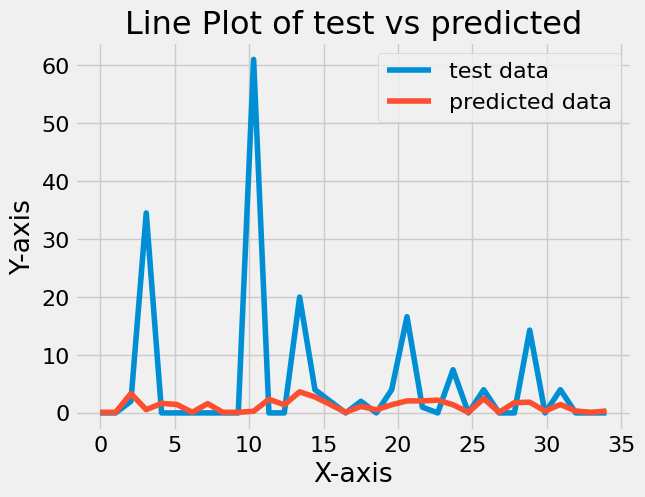

In [383]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x_values = np.linspace(0, y_test.shape[0],y_test.shape[0])  # Create an array of 100 points from 0 to 10
# y1_values = np.sin(x_values)
# y2_values = np.cos(x_values)

# Plotting two numerical arrays in a single plot
plt.plot(x_values,np.array(pred_df['test']), label='test data')
plt.plot(x_values, np.array(pred_df['data']), label='predicted data')

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot of test vs predicted')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

<Axes: ylabel='Final Resolution Time'>

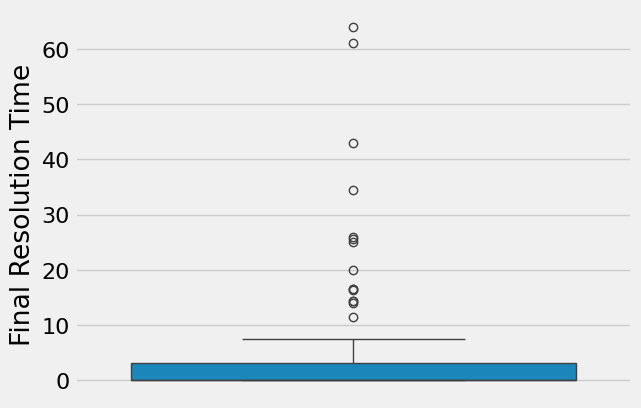

In [384]:
import seaborn as sns
sns.boxplot(y)

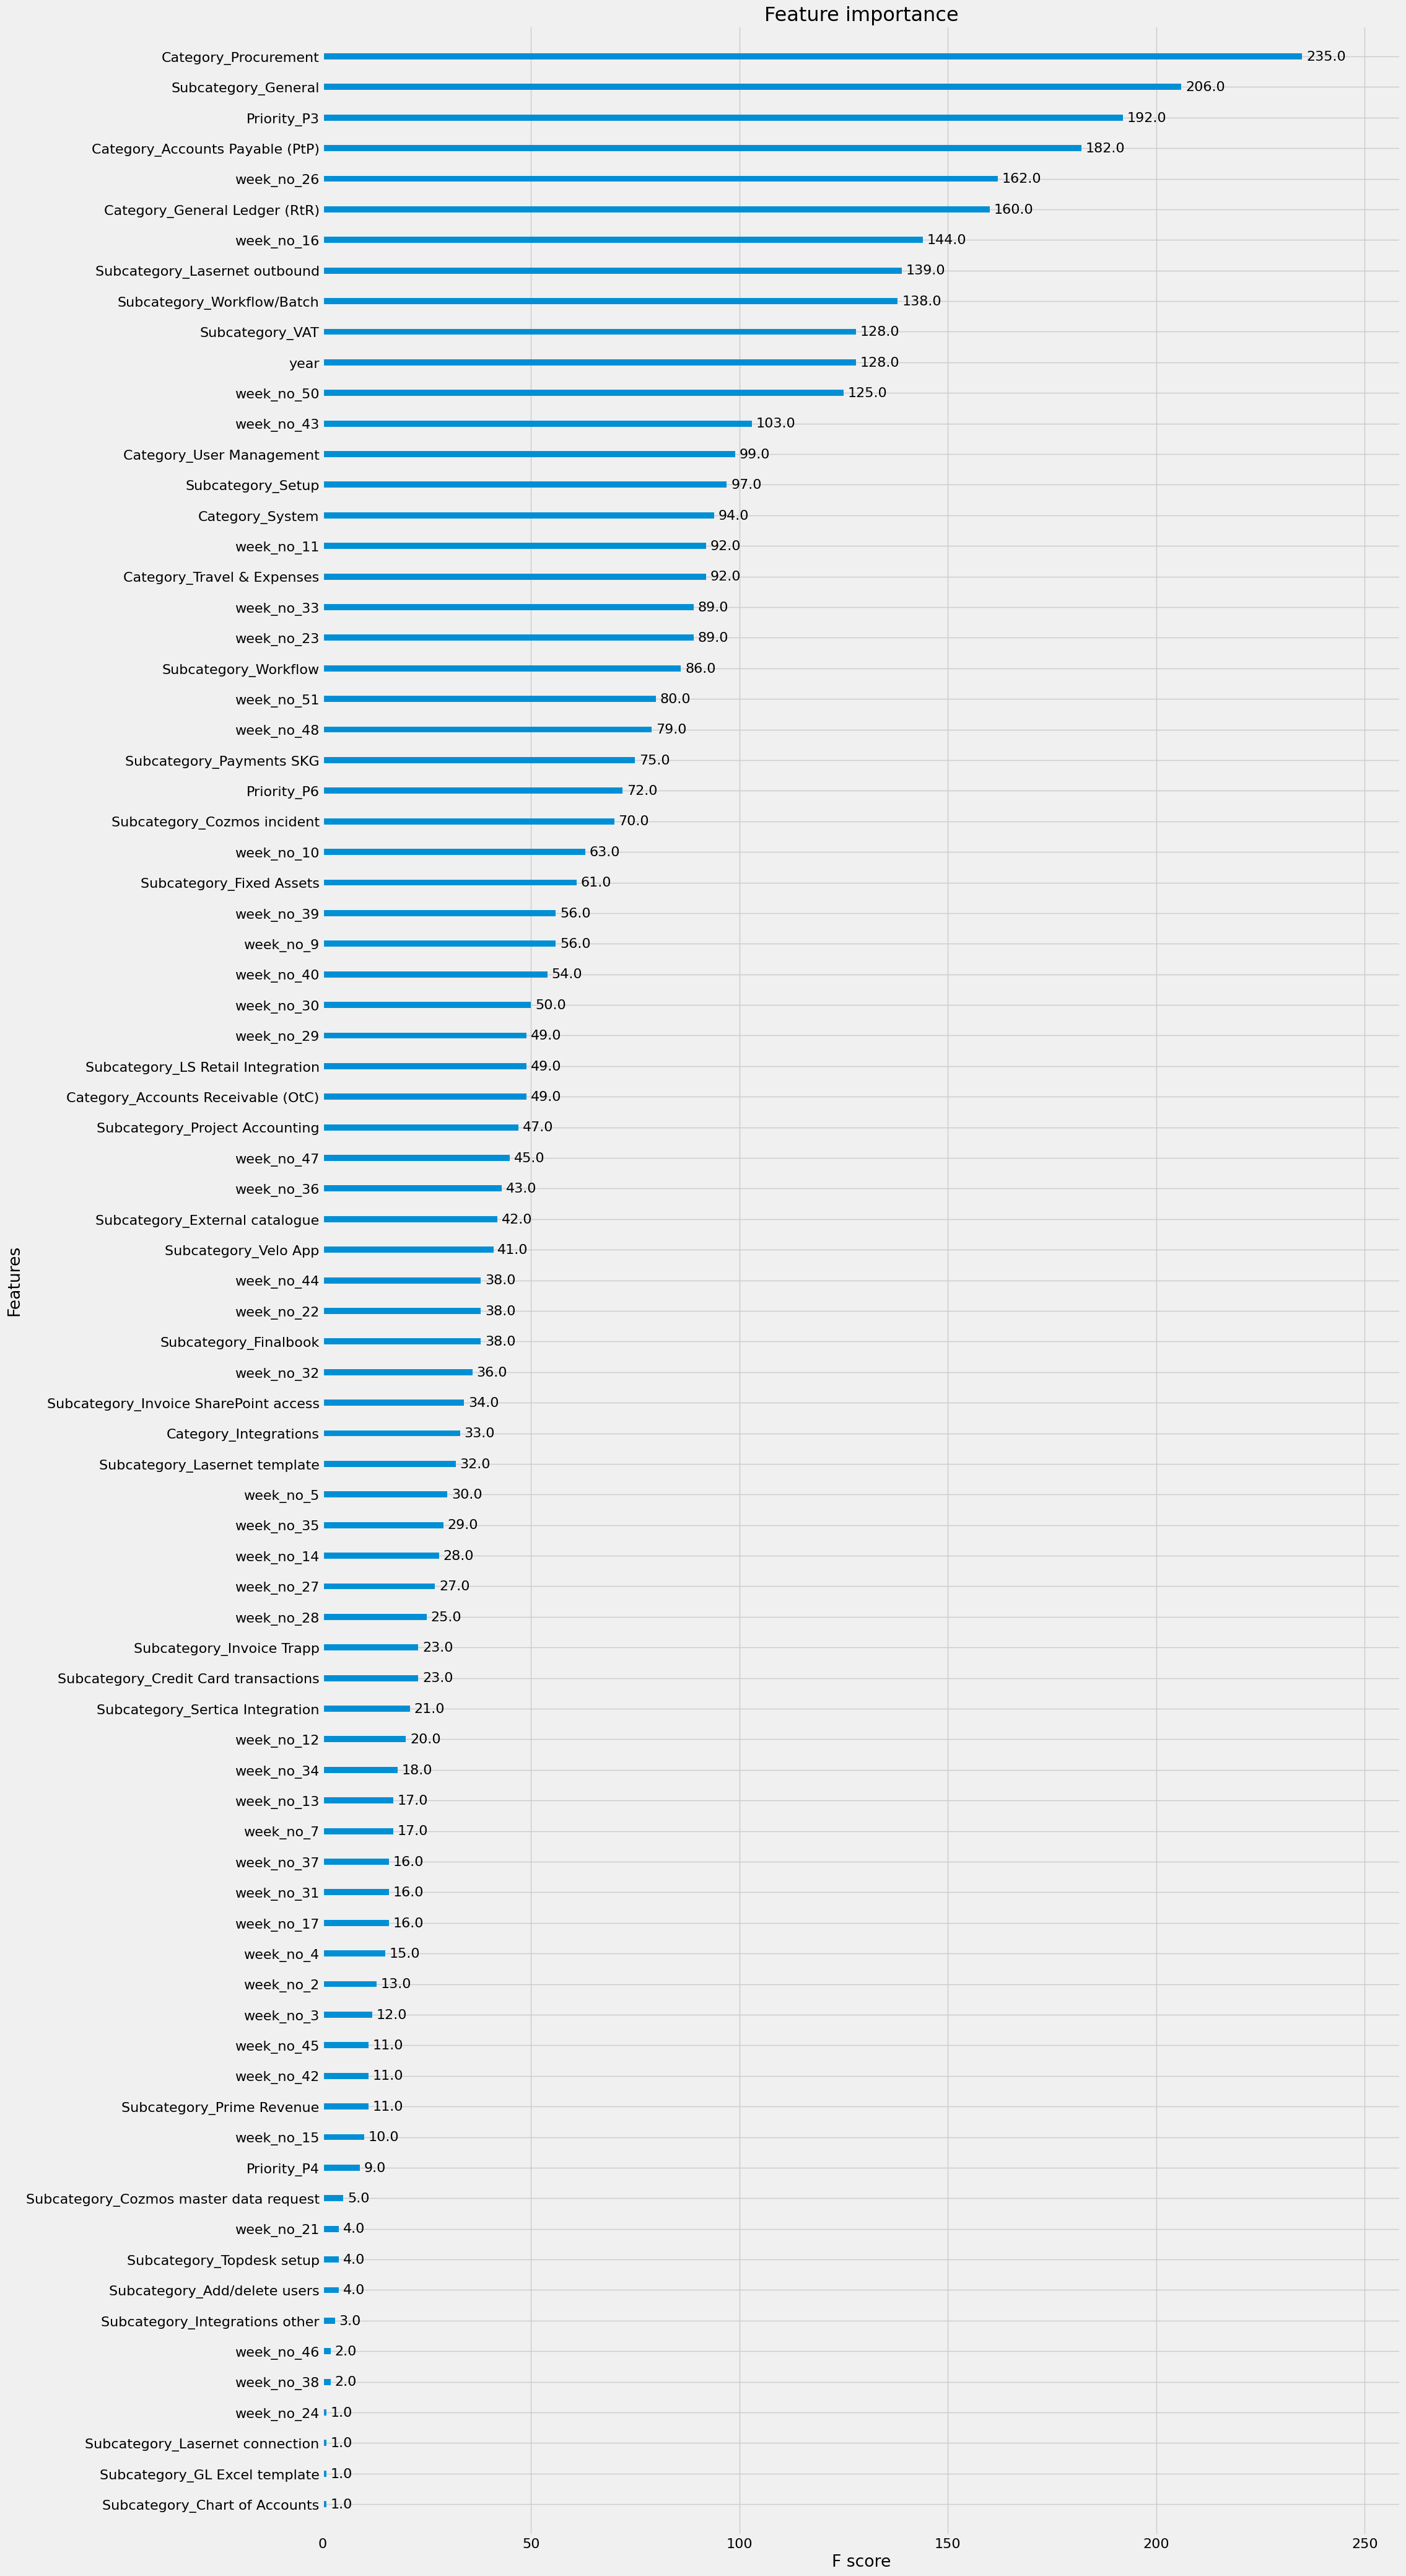

In [301]:
# Setting the plot style and font size
from xgboost import plot_importance
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

# Creating a figure and axis object with specified size
fig, ax = plt.subplots(figsize=(20,50))

# Plotting the feature importance using XGBoost's plot_importance function
plot_importance(regressor
                , max_num_features=120, ax=ax)

# Displaying the plot
plt.show()

In [302]:
rtp_df_modified.columns

Index(['year', 'Priority_P1', 'Priority_P2', 'Priority_P3', 'Priority_P4',
       'Priority_P6', 'Category_ ', 'Category_Accounts Payable (PtP)',
       'Category_Accounts Receivable (OtC)', 'Category_General Ledger (RtR)',
       ...
       'week_no_43', 'week_no_44', 'week_no_45', 'week_no_46', 'week_no_47',
       'week_no_48', 'week_no_49', 'week_no_50', 'week_no_51', 'week_no_52'],
      dtype='object', length=120)

In [1315]:
rtp_df[rtp_df['Resolution Time'] > 630].shape

(7, 9)

In [1316]:
ip = X_test.head(1).to_dict(orient='records')[0]

In [1317]:
ip

{'year': 2023,
 'Priority_P1': False,
 'Priority_P2': False,
 'Priority_P3': True,
 'Priority_P4': False,
 'Priority_P6': False,
 'Category_Accounts Payable (PtP)': False,
 'Category_Accounts Receivable (OtC)': False,
 'Category_General Ledger (RtR)': False,
 'Category_Integrations': False,
 'Category_Procurement': False,
 'Category_System': False,
 'Category_Travel & Expenses': False,
 'Category_User Management': True,
 'Subcategory_Add/delete users': False,
 'Subcategory_Batch job': False,
 'Subcategory_Chart of Accounts': False,
 'Subcategory_Chess Integration': False,
 'Subcategory_Cozmos change request': False,
 'Subcategory_Cozmos incident': False,
 'Subcategory_Cozmos master data request': False,
 'Subcategory_Cozmos request': False,
 'Subcategory_Cozmos template request': False,
 'Subcategory_Credit Card mapping missing': False,
 'Subcategory_Credit Card transactions': False,
 'Subcategory_Credit cards': False,
 'Subcategory_Delegation rights': False,
 'Subcategory_Expense Inte

In [1318]:
rtp_df[(rtp_df['Priority'] == 'P2') & (rtp_df['Category'] == 'User Management') & (rtp_df['Ticket Type'] == 'Request') & (rtp_df['Subcategory'] == 'Add/delete users')]['Resolution Time'].mean()

249.0

In [1073]:
rtp_df.head(10)

,Priority,Category,Subcategory,Ticket Type,year,month,Resolution Time,Resolution Time after removing outlier,Final Resolution Time
0,P6,Accounts Payable (PtP),Lasernet connection,Incident,2023,3,19,19.000000,19.000000
1,P3,Accounts Payable (PtP),Lasernet template,Incident,2023,4,27,48.942857,27.000000
2,P3,Accounts Receivable (OtC),Lasernet outbound,Incident,2023,4,0,112.666667,0.000000
3,P4,Accounts Payable (PtP),General,Incident,2023,4,72,53.233645,53.233645
4,P4,User Management,Role assignment,Incident,2023,4,19,14.489796,14.489796
5,P4,User Management,Role assignment,Incident,2023,4,16,14.489796,14.489796
6,P4,User Management,Role assignment,Incident,2023,4,37,14.489796,14.489796
7,P4,User Management,Role assignment,Incident,2023,4,70,14.489796,14.489796
8,P4,User Management,Delegation rights,Incident,2023,4,120,78.000000,78.000000
9,P4,User Management,Role assignment,Incident,2023,4,49,14.489796,14.489796


In [1074]:
rtp_df[rtp_df['Priority'] == 'P1']['Resolution Time'].mean()

28.333333333333332

In [390]:
rtp_df[rtp_df['Priority'] == 'P1']['Final Resolution Time'].mean()

KeyError: 'Final Resolution Time'

In [92]:
rtp_df[rtp_df['Priority'] == 'P1']['Resolution Time after removing outlier'].mean()

27.13207547169811

In [93]:
rtp_df[(rtp_df['Priority'] == 'P3')].shape

(9083, 9)

In [94]:
pred_df[pred_df['data'] < 0]

,test,data
12472,0.0,-1.149691
12460,0.0,-2.740642


In [209]:
df = pd.read_excel(r'C:\Users\CZ0223\Downloads\All tickets logged Mar 11th 2024.xlsx')

In [353]:
import xgboost as xgb
import os
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
# from user_panel.models import UserPanel
import os   # Importing the os module for operating system related functions
import numpy as np          # NumPy for numerical operations
import pandas as pd         # Pandas for data manipulation and analysis
import datetime             # Datetime module for fetching current time
import shutil               # File processing utility module
from datetime import date   # Date module for fetching current date
from xgboost import XGBRegressor as XGBR # XGB Regressor Model Class
from sklearn.model_selection import (
    GridSearchCV  # GridSearchCV for hyperparameter tuning
    ,train_test_split)  # train_test_split for splitting data
import matplotlib.pyplot as plt   # Matplotlib for plotting
from xgboost import plot_importance  # For plotting the respective importance of individual features
from sklearn.metrics import mean_absolute_percentage_error 
import datetime
import pytz
import businesstimedelta
import holidays as pyholidays 


def find_work_hour_diff(first_date, last_date, work_hour_start="08:00:00", work_hour_end="16:00:00",\
                        lunch_break_start="14:00:00",lunch_break_end="15:00:00", working_days=[0, 1, 2, 3, 4],holidays=[]):
    """
    Calculates the difference between work hours and actual hours between two dates,
    considering work hours, holidays, and cases where dates coincide or end before work hours.

    Args:
        first_date (str): Start date.
        last_date (str): End date.
        work_hour_start (str, optional): Work hour start time. Defaults to "09:30:00".
        work_hour_end (str, optional): Work hour end time. Defaults to "18:30:00".
        holidays (list, optional): List of holidays. Defaults to [].

    Returns:
        tuple: A tuple containing the following:
            total_business_hours (float): Total number of business hours.
            actual_hours (float): Total number of actual hours.
            number_of_business_days (int): Number of business days.
    """
    work_hour_start_list=[int(x) for x in work_hour_start.split(':')]
    work_hour_end_list=[int(x) for x in work_hour_end.split(':')]
    lunch_break_start_list=[int(x) for x in lunch_break_start.split(':')] 
    lunch_break_end_list=[int(x) for x in lunch_break_end.split(':')]
    # Define a working day
    workday = businesstimedelta.WorkDayRule(
        start_time=datetime.time(work_hour_start_list[0],work_hour_start_list[1]),
        end_time=datetime.time(work_hour_end_list[0],work_hour_end_list[1]),
        working_days=working_days)

    # Take out the lunch break
    lunchbreak = businesstimedelta.LunchTimeRule(
        start_time=datetime.time(lunch_break_start_list[0],lunch_break_start_list[1]),
        end_time=datetime.time(lunch_break_end_list[0],lunch_break_end_list[1]),
        working_days=working_days)

    ca_holidays = pyholidays.DNK()
    holidays = businesstimedelta.HolidayRule(ca_holidays)

    # Combine the two
    # businesshrs = businesstimedelta.Rules([workday, lunchbreak, holidays])
    businesshrs = businesstimedelta.Rules([workday,holidays])

    
    first_date, last_date = pd.to_datetime(first_date), pd.to_datetime(last_date)
    
    start = datetime.datetime(first_date.year, first_date.month,\
                              first_date.day, first_date.hour,\
                              first_date.minute, first_date.second)
    end = datetime.datetime(last_date.year, last_date.month,\
                              last_date.day, last_date.hour,\
                              last_date.minute, last_date.second)
    bdiff = businesshrs.difference(start, end)

    return bdiff.hours


def priority_conv(val):
  if (val == 1) or (val == 1.0) or (val == '1'):
    return 'P1'
  elif (val == 2) or (val == 2.0) or (val == '2'):
    return 'P2'
  elif (val == 3) or (val == 3.0) or (val == '3'):
    return 'P3'
  elif (val == 4) or (val == 4.0) or (val == '4'):
    return 'P4'
  else:
    return 'P6'


def last_digit_as_number(s):
    # Extract the last character from the string and convert it to an integer
    return int(s[-1])

def find_actual_resolution_time(df,priority,category,ticket_type,subcategory):
    print(df[(df['Priority'] == priority) & (df['Category'] == category) & (df['Ticket Type'] == ticket_type) & (df['Subcategory'] == subcategory)]['Resolution Time'])
    return df[(df['Priority'] == priority) & (df['Category'] == category) & (df['Ticket Type'] == ticket_type) & (df['Subcategory'] == subcategory)]\
            ['Resolution Time'].mean()
    

def find_months(start_date,end_date):
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')

    # Create a DataFrame with the date range
    df = pd.DataFrame({'Date': date_range})

    # Extract Year and Week number from the 'Date' column
    df['Year'] = df['Date'].dt.year
    df['Week'] = df['Date'].dt.isocalendar().week

    # Get unique pairs of Year and Week number
    unique_year_week_pairs = df[['Year', 'Week']].drop_duplicates()

    # Display the result
    return unique_year_week_pairs.to_dict(orient='records')
  
            
    
def rtp_infer(df,start_date='2023-04-03',end_date='2023-04-18',model_dir_path='.'):
    df.replace('nan',np.nan,inplace=True)
    df.dropna(subset=['Call Date','Completion Date','Priority','Category','Subcategory','Ticket Type'],inplace=True)

    dataset_ticket = df[['Call Date','Completion Date','Priority','Category','Subcategory','Ticket Type']].copy()
    dataset_ticket['Priority'] = dataset_ticket['Priority'].apply(priority_conv)
    # dataset_ticket['Resolution Time'] = dataset_ticket.apply(lambda row : find_work_hour_diff(row['Call Date'],row['Completion Date']),axis=1)
    # print(dataset_ticket.head())
    unique_priority = dataset_ticket['Priority'].value_counts().index.tolist()
    unique_category = dataset_ticket['Category'].value_counts().index.tolist()
    unique_subcategory = dataset_ticket['Subcategory'].value_counts().index.tolist()
    # unique_ticket_type = dataset_ticket['Ticket Type'].value_counts().index.tolist()
    unique_priority = sorted(unique_priority, key=last_digit_as_number)
    unique_category = sorted(unique_category)
    unique_subcategory = sorted(unique_subcategory)
    # unique_ticket_type = sorted(unique_ticket_type)
    unique_category_subcategory = dataset_ticket[['Category','Subcategory']].value_counts().index.tolist()
    

    input_df = pd.DataFrame()
    df2 = dataset_ticket[['Priority','Category','Subcategory']].copy()
    output_df = pd.DataFrame()
    dict_encoded = {}
    dict_encoded['year'] = {0:0}
    columns = ['Priority','Category','Subcategory']
    for column in columns:
        if 'Pri' in column:
            final = unique_priority
        else:
            final = sorted(df2[column])
        for i in final:
            # print(column,'_',i,sep='')
            dict_encoded[column + "_" + i.strip().strip()] = {0: 0}

    # for i in range(1,13):
    #     dict_encoded['month_'+str(i)] = {0:0}
    
    for i in range(1,53):
        dict_encoded[f'week_no_{i}'] = {0:0}  

    dict_encoded['year'] = {0:0}
    print(dict_encoded)
    input_df = pd.DataFrame(dict_encoded)
    output_df = pd.DataFrame(columns = ['Year','week number','Priority','Category','Subcategory','Predicted Time']) 
    date_range = pd.date_range(start=start_date, end=end_date, freq='D') 
    
    predicted_time = 0
    model = xgb.XGBRegressor()
    model.load_model(r'rtp_week_incident.json')
    week_year_dict = find_months(start_date,end_date)
    # for ticket_type in unique_ticket_type:
    for priority in unique_priority:
        for category,subcategory in unique_category_subcategory:
            if category is not None:
                input_df[f"Category_{category}"][0] = 1
            if priority is not None:
                input_df[f"Priority_{priority}"][0] = 1
            if subcategory is not None:
                input_df[f"Subcategory_{subcategory}"][0] = 1
            # if ticket_type is not None:
            #     input_df[f"Ticket Type_{ticket_type}"][0] = 1    
            for val in week_year_dict:
                week_no = val['Week']
                year = val['Year']
                input_df['year'][0] = year
                input_df[f'week_no_{week_no}'][0] = 1
                pridicted_time = model.predict(input_df)[0]
                if (predicted_time < 0):
                    predicted_time = 0
                new_row = {
                    'Year':year, 
                    'week number':week_no,
                    'Priority':priority,
                    'Category':category,
                    'Subcategory':subcategory,
                    'Predicted Time':pridicted_time
                }
                output_df.loc[int(len(output_df))] = new_row
                input_df[f'week_no_{week_no}'][0] = 0
            input_df[f"Subcategory_{subcategory}"][0] = 0  
        input_df[f"Category_{category}"][0] = 0  
        input_df[f"Priority_{priority}"][0] = 0
        # input_df[f"Ticket Type_{ticket_type}"][0] = 0    
                        # input_df[f'day_{day}'][0] = 0
    print('Its a SUCCESS')               
    return output_df
    

In [12]:
import xgboost as xgb
import os
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
# from user_panel.models import UserPanel
import os   # Importing the os module for operating system related functions
import numpy as np          # NumPy for numerical operations
import pandas as pd         # Pandas for data manipulation and analysis
import datetime             # Datetime module for fetching current time
import shutil               # File processing utility module
from datetime import date   # Date module for fetching current date
from xgboost import XGBRegressor as XGBR # XGB Regressor Model Class
from sklearn.model_selection import (
    GridSearchCV  # GridSearchCV for hyperparameter tuning
    ,train_test_split)  # train_test_split for splitting data
import matplotlib.pyplot as plt   # Matplotlib for plotting
from xgboost import plot_importance  # For plotting the respective importance of individual features
from sklearn.metrics import mean_absolute_percentage_error 
import datetime
import pytz
import businesstimedelta
import holidays as pyholidays 


def find_work_hour_diff(first_date, last_date, work_hour_start="08:00:00", work_hour_end="16:00:00",\
                        lunch_break_start="14:00:00",lunch_break_end="15:00:00", working_days=[0, 1, 2, 3, 4],holidays=[]):
    """
    Calculates the difference between work hours and actual hours between two dates,
    considering work hours, holidays, and cases where dates coincide or end before work hours.

    Args:
        first_date (str): Start date.
        last_date (str): End date.
        work_hour_start (str, optional): Work hour start time. Defaults to "09:30:00".
        work_hour_end (str, optional): Work hour end time. Defaults to "18:30:00".
        holidays (list, optional): List of holidays. Defaults to [].

    Returns:
        tuple: A tuple containing the following:
            total_business_hours (float): Total number of business hours.
            actual_hours (float): Total number of actual hours.
            number_of_business_days (int): Number of business days.
    """
    work_hour_start_list=[int(x) for x in work_hour_start.split(':')]
    work_hour_end_list=[int(x) for x in work_hour_end.split(':')]
    lunch_break_start_list=[int(x) for x in lunch_break_start.split(':')] 
    lunch_break_end_list=[int(x) for x in lunch_break_end.split(':')]
    # Define a working day
    workday = businesstimedelta.WorkDayRule(
        start_time=datetime.time(work_hour_start_list[0],work_hour_start_list[1]),
        end_time=datetime.time(work_hour_end_list[0],work_hour_end_list[1]),
        working_days=working_days)

    # Take out the lunch break
    lunchbreak = businesstimedelta.LunchTimeRule(
        start_time=datetime.time(lunch_break_start_list[0],lunch_break_start_list[1]),
        end_time=datetime.time(lunch_break_end_list[0],lunch_break_end_list[1]),
        working_days=working_days)

    ca_holidays = pyholidays.DNK()
    holidays = businesstimedelta.HolidayRule(ca_holidays)

    # Combine the two
    # businesshrs = businesstimedelta.Rules([workday, lunchbreak, holidays])
    businesshrs = businesstimedelta.Rules([workday,holidays])

    
    first_date, last_date = pd.to_datetime(first_date), pd.to_datetime(last_date)
    
    start = datetime.datetime(first_date.year, first_date.month,\
                              first_date.day, first_date.hour,\
                              first_date.minute, first_date.second)
    end = datetime.datetime(last_date.year, last_date.month,\
                              last_date.day, last_date.hour,\
                              last_date.minute, last_date.second)
    bdiff = businesshrs.difference(start, end)

    return bdiff.hours


def priority_conv(val):
  if (val == 1) or (val == 1.0) or (val == '1'):
    return 'P1'
  elif (val == 2) or (val == 2.0) or (val == '2'):
    return 'P2'
  elif (val == 3) or (val == 3.0) or (val == '3'):
    return 'P3'
  elif (val == 4) or (val == 4.0) or (val == '4'):
    return 'P4'
  else:
    return 'P6'


def last_digit_as_number(s):
    # Extract the last character from the string and convert it to an integer
    return int(s[-1])

def find_actual_resolution_time(df,priority,category,ticket_type,subcategory):
    print(df[(df['Priority'] == priority) & (df['Category'] == category) & (df['Ticket Type'] == ticket_type) & (df['Subcategory'] == subcategory)]['Resolution Time'])
    return df[(df['Priority'] == priority) & (df['Category'] == category) & (df['Ticket Type'] == ticket_type) & (df['Subcategory'] == subcategory)]\
            ['Resolution Time'].mean()
    

def find_months(start_date,end_date):
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')

    # Create a DataFrame with the date range
    df = pd.DataFrame({'Date': date_range})

    # Extract Year and Week number from the 'Date' column
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month

    # Get unique pairs of Year and Week number
    unique_year_month_pairs = df[['Year', 'Month']].drop_duplicates()

    # Display the result
    return unique_year_month_pairs.to_dict(orient='records')
  
            
    
def rtp_infer(df,start_date='2023-04-03',end_date='2023-04-17',model_dir_path='.'):
    df.replace('nan',np.nan,inplace=True)
    df.dropna(subset=['Call Date','Completion Date','Priority','Category','Subcategory','Ticket Type'],inplace=True)

    dataset_ticket = df[['Call Date','Completion Date','Priority','Category','Subcategory','Ticket Type']].copy()
    dataset_ticket['Priority'] = dataset_ticket['Priority'].apply(priority_conv)
    # dataset_ticket['Resolution Time'] = dataset_ticket.apply(lambda row : find_work_hour_diff(row['Call Date'],row['Completion Date']),axis=1)
    # print(dataset_ticket.head())
    unique_priority = dataset_ticket['Priority'].value_counts().index.tolist()
    unique_category = dataset_ticket['Category'].value_counts().index.tolist()
    unique_subcategory = dataset_ticket['Subcategory'].value_counts().index.tolist()
    # unique_ticket_type = dataset_ticket['Ticket Type'].value_counts().index.tolist()
    unique_priority = sorted(unique_priority, key=last_digit_as_number)
    unique_category = sorted(unique_category)
    unique_subcategory = sorted(unique_subcategory)
    # unique_ticket_type = sorted(unique_ticket_type)
    unique_category_subcategory = dataset_ticket[['Category','Subcategory']].value_counts().index.tolist()
    

    input_df = pd.DataFrame()
    df2 = dataset_ticket[['Priority','Category','Subcategory']].copy()
    output_df = pd.DataFrame()
    dict_encoded = {}
    dict_encoded['year'] = {0:0}
    columns = ['Priority','Category','Subcategory']
    for column in columns:
        if 'Pri' in column:
            final = unique_priority
        else:
            final = sorted(df2[column])
        for i in final:
            # print(column,'_',i,sep='')
            dict_encoded[column + "_" + i.strip().strip()] = {0: 0}

    # for i in range(1,13):
    #     dict_encoded['month_'+str(i)] = {0:0}
    
    for i in range(1,13):
        dict_encoded[f'month_{i}'] = {0:0}  

    dict_encoded['year'] = {0:0}
    print(dict_encoded)
    input_df = pd.DataFrame(dict_encoded)
    output_df = pd.DataFrame(columns = ['Year','month','Priority','Category','Subcategory','Predicted Time']) 
    date_range = pd.date_range(start=start_date, end=end_date, freq='D') 
    
    predicted_time = 0
    model = xgb.XGBRegressor()
    model.load_model(r'rtp_month_request.json')
    month_year_dict = find_months(start_date,end_date)
    # for ticket_type in unique_ticket_type:
    for priority in unique_priority:
        for category,subcategory in unique_category_subcategory:
            if category is not None:
                input_df[f"Category_{category}"][0] = 1
            if priority is not None:
                input_df[f"Priority_{priority}"][0] = 1
            if subcategory is not None:
                input_df[f"Subcategory_{subcategory}"][0] = 1
            # if ticket_type is not None:
            #     input_df[f"Ticket Type_{ticket_type}"][0] = 1    
            for val in month_year_dict:
                month = val['Month']
                year = val['Year']
                input_df['year'][0] = year
                input_df[f'month_{month}'][0] = 1
                pridicted_time = model.predict(input_df)[0]
                if (predicted_time < 0):
                    predicted_time = 0
                new_row = {
                    'Year':year, 
                    'month':month,
                    'Priority':priority,
                    'Category':category,
                    'Subcategory':subcategory,
                    'Predicted Time':pridicted_time
                }
                output_df.loc[int(len(output_df))] = new_row
                input_df[f'month_{month}'][0] = 0
            input_df[f"Subcategory_{subcategory}"][0] = 0  
        input_df[f"Category_{category}"][0] = 0  
        input_df[f"Priority_{priority}"][0] = 0
        # input_df[f"Ticket Type_{ticket_type}"][0] = 0    
                        # input_df[f'day_{day}'][0] = 0
    print('Its a SUCCESS')               
    return output_df
    

In [419]:
import os
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
# from user_panel.models import UserPanel
import os   # Importing the os module for operating system related functions
import numpy as np          # NumPy for numerical operations
import pandas as pd         # Pandas for data manipulation and analysis
import datetime             # Datetime module for fetching current time
import shutil               # File processing utility module
from datetime import date   # Date module for fetching current date
from xgboost import XGBRegressor as XGBR # XGB Regressor Model Class
from sklearn.model_selection import (
    GridSearchCV  # GridSearchCV for hyperparameter tuning
    ,train_test_split)  # train_test_split for splitting data
import matplotlib.pyplot as plt   # Matplotlib for plotting
from xgboost import plot_importance  # For plotting the respective importance of individual features
from sklearn.metrics import mean_absolute_percentage_error 
import datetime
import pytz
import businesstimedelta
import holidays as pyholidays 

import xgboost as xgb
def find_work_hour_diff(first_date, last_date, work_hour_start="08:00:00", work_hour_end="16:00:00",\
                        lunch_break_start="14:00:00",lunch_break_end="15:00:00", working_days=[0, 1, 2, 3, 4],holidays=[]):
    """
    Calculates the difference between work hours and actual hours between two dates,
    considering work hours, holidays, and cases where dates coincide or end before work hours.
 
    Args:
        first_date (str): Start date.
        last_date (str): End date.
        work_hour_start (str, optional): Work hour start time. Defaults to "09:30:00".
        work_hour_end (str, optional): Work hour end time. Defaults to "18:30:00".
        holidays (list, optional): List of holidays. Defaults to [].
 
    Returns:
        tuple: A tuple containing the following:
            total_business_hours (float): Total number of business hours.
            actual_hours (float): Total number of actual hours.
            number_of_business_days (int): Number of business days.
    """
    work_hour_start_list=[int(x) for x in work_hour_start.split(':')]
    work_hour_end_list=[int(x) for x in work_hour_end.split(':')]
    lunch_break_start_list=[int(x) for x in lunch_break_start.split(':')] 
    lunch_break_end_list=[int(x) for x in lunch_break_end.split(':')]
    # Define a working day
    workday = businesstimedelta.WorkDayRule(
        start_time=datetime.time(work_hour_start_list[0],work_hour_start_list[1]),
        end_time=datetime.time(work_hour_end_list[0],work_hour_end_list[1]),
        working_days=working_days)
 
    # Take out the lunch break
    lunchbreak = businesstimedelta.LunchTimeRule(
        start_time=datetime.time(lunch_break_start_list[0],lunch_break_start_list[1]),
        end_time=datetime.time(lunch_break_end_list[0],lunch_break_end_list[1]),
        working_days=working_days)
 
    ca_holidays = pyholidays.DNK()
    holidays = businesstimedelta.HolidayRule(ca_holidays)
 
    # Combine the two
    # businesshrs = businesstimedelta.Rules([workday, lunchbreak, holidays])
    businesshrs = businesstimedelta.Rules([workday,holidays])
 
    
    first_date, last_date = pd.to_datetime(first_date), pd.to_datetime(last_date)
    start = datetime.datetime(first_date.year, first_date.month,\
                              first_date.day, first_date.hour,\
                              first_date.minute, first_date.second)
    end = datetime.datetime(last_date.year, last_date.month,\
                              last_date.day, last_date.hour,\
                              last_date.minute, last_date.second)
    bdiff = businesshrs.difference(start, end)
 
    return bdiff.hours
 
 
def priority_conv(val):
  if (val == 1) or (val == 1.0) or (val == '1'):
    return 'P1'
  elif (val == 2) or (val == 2.0) or (val == '2'):
    return 'P2'
  elif (val == 3) or (val == 3.0) or (val == '3'):
    return 'P3'
  elif (val == 4) or (val == 4.0) or (val == '4'):
    return 'P4'
  else:
    return 'P6'
 
 
def last_digit_as_number(s):
    # Extract the last character from the string and convert it to an integer
    return int(s[-1])
 
def find_actual_resolution_time(df,priority,category,subcategory):
    print(df[(df['Priority'] == priority) & (df['Category'] == category) & (df['Subcategory'] == subcategory)]['Resolution Time'])
    return df[(df['Priority'] == priority) & (df['Category'] == category) & (df['Subcategory'] == subcategory)]\
            ['Resolution Time'].mean()

 
def find_months(start_date,end_date):
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
 
    # Create a DataFrame with the date range
    df = pd.DataFrame({'Date': date_range})
 
    # Extract Year and Week number from the 'Date' column
    df['Year'] = df['Date'].dt.year
    df['Week'] = df['Date'].dt.isocalendar().week
 
    # Get unique pairs of Year and Week number
    unique_year_week_pairs = df[['Year', 'Week']].drop_duplicates()
 
    # Display the result
    return unique_year_week_pairs.to_dict(orient='records')

def rtp_infer(df,ticket_type,start_date='2024-04-01',end_date='2024-04-10',model_dir_path='./Monthly_Question.json'):
    # df=df[df['Ticket Type']==ticket_type]
    df.replace('',np.nan,inplace=True)
    df.replace(' ',np.nan,inplace=True)

    df.replace('nan',np.nan,inplace=True)
    df.dropna(subset=['Call Date','Completion Date','Priority','Category','Subcategory'],inplace=True)
 
    dataset_ticket = df[['Call Date','Completion Date','Priority','Category','Subcategory']].copy()
    dataset_ticket['Priority'] = dataset_ticket['Priority'].apply(priority_conv)
    # dataset_ticket['Resolution Time'] = dataset_ticket.apply(lambda row : find_work_hour_diff(row['Call Date'],row['Completion Date']),axis=1)
    # print(dataset_ticket.head())
    unique_priority = dataset_ticket['Priority'].value_counts().index.tolist()
    unique_category = dataset_ticket['Category'].value_counts().index.tolist()
    unique_category_subcategory = dataset_ticket[['Category','Subcategory']].value_counts().index.tolist()
    unique_subcategory = dataset_ticket['Subcategory'].value_counts().index.tolist()
    unique_priority = sorted(unique_priority, key=last_digit_as_number)
    unique_category = sorted(unique_category)
    unique_subcategory = sorted(unique_subcategory)

 
    input_df = pd.DataFrame()
    df2 = dataset_ticket[['Priority','Category','Subcategory']].copy()
    output_df = pd.DataFrame()
    dict_encoded = {}
    dict_encoded['year'] = {0:0}
    columns = ['Priority','Category','Subcategory']
    for column in columns:
        if 'Pri' in column:
            final = unique_priority
        else:
            final = sorted(df2[column])
        for i in final:
            # print(column,'_',i,sep='')
            dict_encoded[column + "_" + i.strip().strip()] = {0: 0}
 
    # for i in range(1,13):
    #     dict_encoded['month_'+str(i)] = {0:0}
    for i in range(1,53):
        dict_encoded[f'week_no_{i}'] = {0:0}  
 
    dict_encoded['year'] = {0:0}
    dict_encoded[f'Ticket Type_{ticket_type}'] = {0:1}
    print(dict_encoded)
    input_df = pd.DataFrame(dict_encoded)
    output_df = pd.DataFrame(columns = ['Year','week number','Ticket Type','Priority','Category','Subcategory','Predicted Time']) 
    date_range = pd.date_range(start=start_date, end=end_date, freq='D') 
    predicted_time = 0
    model = xgb.XGBRegressor()
    model.load_model(model_dir_path)
    week_year_dict = find_months(start_date,end_date)
    for priority in unique_priority:
        for category,subcategory in unique_category_subcategory:
            if category is not None:
                input_df[f"Category_{category}"][0] = 1
            if priority is not None:
                input_df[f"Priority_{priority}"][0] = 1
            if subcategory is not None:
                input_df[f"Subcategory_{subcategory}"][0] = 1
            for val in week_year_dict:
                week_no = val['Week']
                year = val['Year']
                input_df['year'][0] = year
                input_df[f'week_no_{week_no}'][0] = 1
                pridicted_time = model.predict(input_df[model.feature_names_in_])[0]
                if (predicted_time < 0):
                    predicted_time = 0
                new_row = {
                    'Year':year, 
                    'week number':week_no,
                    'Ticket Type':ticket_type,
                    'Priority':priority,
                    'Category':category,
                    'Subcategory':subcategory,
                    'Predicted Time':pridicted_time
                }
                output_df.loc[int(len(output_df))] = new_row
                input_df[f'week_no_{week_no}'][0] = 0
            input_df[f"Subcategory_{subcategory}"][0] = 0  
            input_df[f"Category_{category}"][0] = 0  
        input_df[f"Priority_{priority}"][0] = 0

    print('Its a SUCCESS') 
    # print(output_df)       
    output_df.loc[output_df['Predicted Time'] < 0, 'Predicted Time'] = 7
    return output_df

In [415]:
df2 = rtp_infer(df,ticket_type='Question')

{'year': {0: 0}, 'Priority_P6': {0: 0}, 'Category_Accounts Payable (PtP)': {0: 0}, 'Category_Accounts Receivable (OtC)': {0: 0}, 'Category_General Ledger (RtR)': {0: 0}, 'Category_Integrations': {0: 0}, 'Category_Procurement': {0: 0}, 'Category_System': {0: 0}, 'Category_Travel & Expenses': {0: 0}, 'Category_User Management': {0: 0}, 'Subcategory_Add/delete users': {0: 0}, 'Subcategory_Batch job': {0: 0}, 'Subcategory_Cash Management': {0: 0}, 'Subcategory_Chart of Accounts': {0: 0}, 'Subcategory_Chess Integration': {0: 0}, 'Subcategory_Cozmos change request': {0: 0}, 'Subcategory_Cozmos incident': {0: 0}, 'Subcategory_Cozmos master data request': {0: 0}, 'Subcategory_Cozmos request': {0: 0}, 'Subcategory_Cozmos template request': {0: 0}, 'Subcategory_Credit Card mapping missing': {0: 0}, 'Subcategory_Credit Card transactions': {0: 0}, 'Subcategory_Credit cards': {0: 0}, 'Subcategory_Delegation rights': {0: 0}, 'Subcategory_Expense Integration': {0: 0}, 'Subcategory_External catalogue'

KeyError: "['Priority_P1', 'Priority_P2', 'Priority_P3', 'Priority_P4', 'Subcategory_ ', 'Ticket Type_Question'] not in index"

In [379]:
df1[df1['Priority'] == 'P1'].head()

,Year,week number,Ticket Type,Priority,Category,Subcategory,Predicted Time
0,2024,14,Incident,P1,User Management,Add/delete users,7.614885
1,2024,15,Incident,P1,User Management,Add/delete users,7.614885
2,2024,14,Incident,P1,User Management,Role assignment,7.591832
3,2024,15,Incident,P1,User Management,Role assignment,7.591832
4,2024,14,Incident,P1,Integrations,Seabook Integration,3.744578


In [381]:
df2[df2['Priority'] == 'P1'].head()

,Year,week number,Ticket Type,Priority,Category,Subcategory,Predicted Time
0,2024,14,Request,P1,User Management,Add/delete users,16.988632
1,2024,15,Request,P1,User Management,Add/delete users,4.021736
2,2024,14,Request,P1,User Management,Role assignment,16.988632
3,2024,15,Request,P1,User Management,Role assignment,4.021736
4,2024,14,Request,P1,Integrations,Seabook Integration,12.333154


In [458]:
df1[(df1['Ticket Type'] == 'Incident') & (df1['Priority'] == 'P1') & (df1['Category'] == 'System')].head(10)

,Year,week number,Ticket Type,Priority,Category,Subcategory,Predicted Time
500,2023,52,Incident,P1,System,Add/delete users,20.245136
501,2023,1,Incident,P1,System,Add/delete users,23.215736
502,2023,52,Incident,P1,System,Batch job,5.691588
503,2023,1,Incident,P1,System,Batch job,8.662187
504,2023,52,Incident,P1,System,Chart of Accounts,20.245136
505,2023,1,Incident,P1,System,Chart of Accounts,23.215736
506,2023,52,Incident,P1,System,Chess Integration,20.245136
507,2023,1,Incident,P1,System,Chess Integration,23.215736
508,2023,52,Incident,P1,System,Cozmos change request,38.011490
509,2023,1,Incident,P1,System,Cozmos change request,40.555481


In [434]:
rtp_df[(rtp_df['Ticket Type'] == 'Request') & (rtp_df['Priority'] == 'P1') & (rtp_df['Category'] == 'Procurement')]['Resolution Time'].mean()

nan

In [435]:
rtp_df[(rtp_df['Ticket Type'] == 'Incident') & (rtp_df['Priority'] == 'P1') & (rtp_df['Category'] == 'Procurement')]['Resolution Time'].mean()

40.0

In [5]:
# Importing necessary libraries and modules
# import os   # Importing the os module for operating system related functions
# import numpy as np          # NumPy for numerical operations
# import pandas as pd         # Pandas for data manipulation and analysis
# import datetime             # Datetime module for fetching current time
# import shutil               # File processing utility module
# from datetime import date   # Date module for fetching current date
# from xgboost import XGBRegressor as XGBR # XGB Regressor Model Class
# from sklearn.model_selection import (
#     GridSearchCV  # GridSearchCV for hyperparameter tuning
#     ,train_test_split)  # train_test_split for splitting data
# import matplotlib.pyplot as plt   # Matplotlib for plotting
# from xgboost import plot_importance  # For plotting the respective importance of individual features
# from sklearn.metrics import mean_absolute_percentage_error 
# import datetime
# import pytz
# import businesstimedelta
# import holidays as pyholidays # Function for calculating mean absolute percentage error

# import logging  


# #function to fill the priority as per the requirement
# def priority_conv(val):
#   if (val == 1) or (val == 1.0) or (val == '1'):
#     return 'P1'
#   elif (val == 2) or (val == 2.0) or (val == '2'):
#     return 'P2'
#   elif (val == 3) or (val == 3.0) or (val == '3'):
#     return 'P3'
#   elif (val == 4) or (val == 4.0) or (val == '4'):
#     return 'P4'
#   else:
#     return 'P6'
  
# #function to find the business difference between two dates
# def find_work_hour_diff(first_date, last_date, work_hour_start="08:00:00", work_hour_end="16:00:00",\
#                         lunch_break_start="14:00:00",lunch_break_end="15:00:00", working_days=[0, 1, 2, 3, 4],holidays=[]):
#     """
#     Calculates the difference between work hours and actual hours between two dates,
#     considering work hours, holidays, and cases where dates coincide or end before work hours.

#     Args:
#         first_date (str): Start date.
#         last_date (str): End date.
#         work_hour_start (str, optional): Work hour start time. Defaults to "09:30:00".
#         work_hour_end (str, optional): Work hour end time. Defaults to "18:30:00".
#         holidays (list, optional): List of holidays. Defaults to [].

#     Returns:
#         tuple: A tuple containing the following:
#             total_business_hours (float): Total number of business hours.
#             actual_hours (float): Total number of actual hours.
#             number_of_business_days (int): Number of business days.
#     """
#     work_hour_start_list=[int(x) for x in work_hour_start.split(':')]
#     work_hour_end_list=[int(x) for x in work_hour_end.split(':')]
#     lunch_break_start_list=[int(x) for x in lunch_break_start.split(':')] 
#     lunch_break_end_list=[int(x) for x in lunch_break_end.split(':')]
#     # Define a working day
#     workday = businesstimedelta.WorkDayRule(
#         start_time=datetime.time(work_hour_start_list[0],work_hour_start_list[1]),
#         end_time=datetime.time(work_hour_end_list[0],work_hour_end_list[1]),
#         working_days=working_days)

#     # Take out the lunch break
#     lunchbreak = businesstimedelta.LunchTimeRule(
#         start_time=datetime.time(lunch_break_start_list[0],lunch_break_start_list[1]),
#         end_time=datetime.time(lunch_break_end_list[0],lunch_break_end_list[1]),
#         working_days=working_days)

#     ca_holidays = pyholidays.DNK()
#     holidays = businesstimedelta.HolidayRule(ca_holidays)

#     # Combine the two
#     # businesshrs = businesstimedelta.Rules([workday, lunchbreak, holidays])
#     businesshrs = businesstimedelta.Rules([workday,holidays])

    
#     first_date, last_date = pd.to_datetime(first_date), pd.to_datetime(last_date)
    
#     start = datetime.datetime(first_date.year, first_date.month,\
#                               first_date.day, first_date.hour,\
#                               first_date.minute, first_date.second)
#     end = datetime.datetime(last_date.year, last_date.month,\
#                               last_date.day, last_date.hour,\
#                               last_date.minute, last_date.second)
#     bdiff = businesshrs.difference(start, end)

#     return bdiff.hours

# #function to find the actual resolution time by removing the outliers
# def find_final_rt(actual,avg):
#     if avg == 'nan' or avg == np.nan:
#         avg = 0
#     return min(avg,actual)

# #function to find the average resolution time for each combination of  priority,category,subcategory and ticket type
# def find_mean(rtp_df,priority,category,subcategory,ticket_type):
#     return rtp_df[(rtp_df['Priority'] == priority) & (rtp_df['Category'] == category) & (rtp_df['Ticket Type'] == ticket_type) & (rtp_df['Subcategory'] == subcategory)]\
# ['Resolution Time'].mean()

 

# def data_preprocessing(dataset_required,ticket_type, return_whole_encoded_dataset=False):
#     """
#     Selecting only required columns and renaming them as required
#     """
#     dataset_required=dataset_required[['Category', 'Subcategory',   'Priority', 'Ticket Type', 
#                                        'Call Date','Completion Date']]
#     # dataset_required.rename(columns={'category': 'Category',
#     #                             'subcategory': 'Subcategory',
#     #                             'priority': 'Priority',
#     #                             'ticket_type': 'Ticket Type',
#     #                             'number_of_days_current': 'Number of days current'},inplace=True)

#     """
#     Type Safteying
#     """
#     dataset_required.replace('nan',np.nan,inplace=True)
#     """
#     NULL VALUE REMOVAL
#     """
#     # Remove the all null values from the data
#     dataset_required.dropna(inplace=True)


#     """
#     extract the year,month,day and hour from the call date
#     """
#     dataset_required['Call Date'] =  pd.to_datetime(dataset_required['Call Date'])
#     dataset_required['Completion Date'] =  pd.to_datetime(dataset_required['Completion Date'])
#     dataset_required['year'] = dataset_required['Call Date'].dt.year
#     dataset_required['month'] = dataset_required['Call Date'].dt.month
  



#     """
#     APPLY CUSTOM FUNCTIONS TO GET THE DATA IN THE DESIRED FORMAT
#     """
#     dataset_required['Priority'] = dataset_required['Priority'].apply(priority_conv)
#     dataset_required['Resolution Time'] = dataset_required.apply(lambda row:find_work_hour_diff(row['Call Date'],row['Completion Date']),axis=1)
#     dataset_required = dataset_required[dataset_required['Ticket Type'] == ticket_type]

#     """
#     OUTLIER REMOVAL ONLY FROM TRAINING DATA
#     """
#     dataset_required['Resolution Time after removing outlier'] = dataset_required.apply(lambda row: find_mean(dataset_required,row['Priority'],row['Category'],row['Subcategory'],row['Ticket Type']),axis=1)
#     dataset_required['Final Resolution Time'] = dataset_required.apply(lambda row : find_final_rt(row['Resolution Time'],row['Resolution Time after removing outlier']),axis=1)
#     # dataset_required = dataset_required[dataset_required['Final Resolution Time'] < 150]

#     """
#     REMOVING THE COLUMNS WHICH ARE NOT REQUIRED FOR THE PREDICTION
#     """
#     dataset_required.drop(columns=['Call Date','Completion Date','Resolution Time','Resolution Time after removing outlier','Ticket Type'],inplace=True)

#     """
#     ONE-HOT ENCODING OF CATEGORICAL VARIABLES
#     """
#     # Convert categorical variables into dummy variables
#     # Priority, Category, Subcategory, and Ticket Type columns will be one-hot encoded
#     progress_modified = pd.get_dummies(dataset_required, columns=['Priority', 'Category', 'Subcategory', 'month'])


#     """
#     FEATURE(INPUT)-LABEL(OUTPUT) SEPARATION
#     """
#     # Set the output of label column
#     label_column= 'Final Resolution Time'
    
    
#     # Drop the target column from the DataFrame and assign the rest to X
#     X = progress_modified.drop(label_column, axis=1)
    
#     # Assign the target column to y
#     y = progress_modified[label_column]

#     if not return_whole_encoded_dataset:
#         return X, y
#     else:
#         return X, y, progress_modified 

    
# def find_unique_ticket_type(dataset_latest_ticket):
#     return dataset_latest_ticket['Ticket Type'].value_counts().index.tolist()
    
# def train_model(X_train,
#                 y_train,

#                 param_grid={                    # Define a dictionary with hyperparameters to be tuned and their respective values
#                     "max_depth": [3, 4, 5, 6, 7],
#                     "learning_rate": [0.015, 0.02, 0.025, 0.03],
#                     "max_leaves": [5, 7, 9, 11, 13],
#                     "n_estimators": [200, 300, 400, 500],},
#                random_state=42         # Define random state
#                ):
    

    
#     # Print the shapes of the training and testing sets
#     print("Shapes of Training set - Features:", X_train.shape, "Labels:", y_train.shape)
#     # print("Shapes of Testing set - Features:", X_test.shape, "Labels:", y_test.shape)

#     # # Load model created today or create a new one
#     # # if :
#     #     # Load existing models created earlier today from a JSON file
#     #     regressor=XGBR()
#     #     regressor.load_model(f"RTP_model.json")
#     # else:
#     #     # Creating an instance of XGBoost Regressor Model class
#     regressor=XGBR()
    
#     # Initialize GridSearchCV with the regressor (e.g., XGBoost) and the parameter grid
#     # cv=5 specifies 5-fold cross-validation
#     # search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)
    
#     # Fit the model with every combination of the above values
#     # search.best_params_ returns the best combination of hyperparameters found during the search
#     # print("The best hyperparameters are ", search.best_params_)

#     # Creating an XGBoost regressor with the best parameters obtained from grid search
#     regressor = XGBR(learning_rate=0.03,
#                                 n_estimators=600,
#                                 max_leaves=13,
#                                 max_depth=6,
#                                 eval_metric='rmse')

    
        
#     # Fitting the regressor to the training data
#     regressor.fit(X_train, y_train)

#     return regressor


# def rtp_main(dataset_latest_ticket,model_dir_path='.',model_file_name='Monthly_',test_size=0.3,random_state=23,\
#     table_name='ResolutionTimePredictionOutput',\
#     logfilename=f"rtp{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.log",test=False):

#     # Create and configure logger
#     logging.basicConfig(filename=logfilename,\
# 					format='%(asctime)s %(message)s',\
# 					filemode='w',level=logging.INFO)
#     stream_handler = logging.StreamHandler()
#     stream_handler.setLevel(logging.INFO)  # Set level to INFO for this handler


#     # Creating an object
#     logger = logging.getLogger(__name__)

#     # Setting the threshold of logger to DEBUG
#     logger.setLevel(logging.DEBUG)

#     logger.info("Logging Started!")
    
#     df['Call Date'] = pd.to_datetime(df['Call Date'])
#     df['Completion Date'] = pd.to_datetime(df['Completion Date'])
    
#     unique_ticket_types = find_unique_ticket_type(dataset_latest_ticket)
    
#     for ticket_type in unique_ticket_types:

#         X,y=data_preprocessing(dataset_latest_ticket,ticket_type)
#         logger.info("Data was preprocessed.")

#         X=X.astype('int')
#         # Split the data into training and testing sets
#         X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1-test_size, test_size=test_size, random_state=random_state)
#         logger.info("Test train split was carried out.")

#         if not test:
#             print('##'*23)
#             regressor = train_model(
#                 X_train, y_train,      # Training Data
#                 # param_grid=,         # Parameter Grid
#             random_state=42         # Define random state
#             )
#         else:
#             print('-'*22)
#             regressor=XGBR()
#             regressor.fit(X_train,y_train)
#         logger.info("Model was trained.")

#         # Saving the model
#         regressor.save_model(f'{model_file_name}{ticket_type}.json')
#         shutil.move(f'{model_file_name}{ticket_type}.json', rf'{model_dir_path}/{model_file_name}{ticket_type}.json')  # move model JSON file

#         logger.info(f"Model was saved in {model_dir_path} directory.")

        
        # Importing necessary libraries and modules
import os   # Importing the os module for operating system related functions
import numpy as np          # NumPy for numerical operations
import pandas as pd         # Pandas for data manipulation and analysis
import datetime             # Datetime module for fetching current time
import shutil               # File processing utility module
from datetime import date   # Date module for fetching current date
from xgboost import XGBRegressor as XGBR # XGB Regressor Model Class
from sklearn.model_selection import (
    GridSearchCV  # GridSearchCV for hyperparameter tuning
    ,train_test_split)  # train_test_split for splitting data
import matplotlib.pyplot as plt   # Matplotlib for plotting
from xgboost import plot_importance  # For plotting the respective importance of individual features
from sklearn.metrics import mean_absolute_percentage_error 
import datetime
import pytz
import sys          # system module for receiving argument from CLI
import businesstimedelta
import holidays as pyholidays # Function for calculating mean absolute percentage error

import logging  

def fill_missing_week(df2):
    unique_weekday = sorted(df2['week_no'].value_counts().index.tolist())
    for i in range(1,53):
        unique_weekday = sorted(df2['week_no'].value_counts().index.tolist())
        if i not in unique_weekday:
            new_dict = df2.iloc[-1].to_dict()
            index_to_insert = len(df2) 
            # print(index_to_insert)
            new_dict['week_no'] = i
            new_dict['Final Resolution Time'] = 0.00
            new_record = new_dict
            # print(new_record)
            df2.loc[-1] = new_record 
            df2 = df2.reset_index(drop=True)
    return df2

def fill_missing_month(df2):
    unique_weekday = sorted(df2['month'].value_counts().index.tolist())
    for i in range(1,13):
        unique_weekday = sorted(df2['month'].value_counts().index.tolist())
        if i not in unique_weekday:
            new_dict = df2.iloc[-1].to_dict()
            index_to_insert = len(df2) 
            print(index_to_insert)
            new_dict['month'] = i
            new_dict['Final Resolution Time'] = 0.00
            new_record = new_dict
            print(new_record)
            df2.loc[-1] = new_record 
            df2 = df2.reset_index(drop=True)
    return df2


def fill_missing_sub(df2,df):
    unique_sub = sorted(df2['Subcategory'].value_counts().index.tolist())
    actual_sub = sorted(df['Subcategory'].value_counts().index.tolist())
    if ' ' in actual_sub:
        actual_sub.remove(' ')
    for i in range(len(actual_sub)):
        unique_sub = sorted(df2['Subcategory'].value_counts().index.tolist())
        if actual_sub[i] not in unique_sub:
            new_dict = df2.iloc[-1].to_dict()
            index_to_insert = len(df2) 
            # print(index_to_insert)
            new_dict['Subcategory'] = actual_sub[i]
            new_dict['Final Resolution Time'] = 0.00
            new_record = new_dict
            # print(new_record)
            df2.loc[-1] = new_record 
            df2 = df2.reset_index(drop=True)
    return df2
 
    
def fill_missing_priority(df2,df):
    unique_sub = sorted(df2['Priority'].value_counts().index.tolist())
    actual_sub = sorted(df['Priority'].value_counts().index.tolist())
    print(unique_sub,actual_sub)
    for i in range(len(actual_sub)):
        unique_sub = sorted(df2['Priority'].value_counts().index.tolist())
        if actual_sub[i] not in unique_sub:
            new_dict = df2.iloc[-1].to_dict()
            index_to_insert = len(df2) 
            # print(index_to_insert)
            new_dict['Priority'] = actual_sub[i]
            new_dict['Final Resolution Time'] = 0.00
            new_record = new_dict
            # print(new_record)
            df2.loc[-1] = new_record 
            df2 = df2.reset_index(drop=True)
    return df2
    
#function to fill the priority as per the requirement
            
def priority_conv(val):
  if (val == 1) or (val == 1.0) or (val == '1'):
    return 'P1'
  elif (val == 2) or (val == 2.0) or (val == '2'):
    return 'P2'
  elif (val == 3) or (val == 3.0) or (val == '3'):
    return 'P3'
  elif (val == 4) or (val == 4.0) or (val == '4'):
    return 'P4'
  else:
    return 'P6'
  
#function to find the business difference between two dates
def find_work_hour_diff(first_date, last_date, work_hour_start="08:00:00", work_hour_end="16:00:00",\
                        lunch_break_start="14:00:00",lunch_break_end="15:00:00", working_days=[0, 1, 2, 3, 4],holidays=[]):
    """
    Calculates the difference between work hours and actual hours between two dates,
    considering work hours, holidays, and cases where dates coincide or end before work hours.

    Args:
        first_date (str): Start date.
        last_date (str): End date.
        work_hour_start (str, optional): Work hour start time. Defaults to "09:30:00".
        work_hour_end (str, optional): Work hour end time. Defaults to "18:30:00".
        holidays (list, optional): List of holidays. Defaults to [].

    Returns:
        tuple: A tuple containing the following:
            total_business_hours (float): Total number of business hours.
            actual_hours (float): Total number of actual hours.
            number_of_business_days (int): Number of business days.
    """
    work_hour_start_list=[int(x) for x in work_hour_start.split(':')]
    work_hour_end_list=[int(x) for x in work_hour_end.split(':')]
    lunch_break_start_list=[int(x) for x in lunch_break_start.split(':')] 
    lunch_break_end_list=[int(x) for x in lunch_break_end.split(':')]
    # Define a working day
    workday = businesstimedelta.WorkDayRule(
        start_time=datetime.time(work_hour_start_list[0],work_hour_start_list[1]),
        end_time=datetime.time(work_hour_end_list[0],work_hour_end_list[1]),
        working_days=working_days)

    # Take out the lunch break
    lunchbreak = businesstimedelta.LunchTimeRule(
        start_time=datetime.time(lunch_break_start_list[0],lunch_break_start_list[1]),
        end_time=datetime.time(lunch_break_end_list[0],lunch_break_end_list[1]),
        working_days=working_days)

    ca_holidays = pyholidays.DNK()
    holidays = businesstimedelta.HolidayRule(ca_holidays)

    # Combine the two
    # businesshrs = businesstimedelta.Rules([workday, lunchbreak, holidays])
    businesshrs = businesstimedelta.Rules([workday,holidays])

    
    first_date, last_date = pd.to_datetime(first_date), pd.to_datetime(last_date)
    
    start = datetime.datetime(first_date.year, first_date.month,\
                              first_date.day, first_date.hour,\
                              first_date.minute, first_date.second)
    end = datetime.datetime(last_date.year, last_date.month,\
                              last_date.day, last_date.hour,\
                              last_date.minute, last_date.second)
    bdiff = businesshrs.difference(start, end)
    
    return int(bdiff.hours)

#function to find the actual resolution time by removing the outliers
def find_final_rt(actual,avg):
    if avg == 'nan' or avg == np.nan:
        avg = 0
    return min(avg,actual)

#function to find the average resolution time for each combination of  priority,category,subcategory and ticket type
def find_mean(rtp_df,priority,category,subcategory,ticket_type):
    return rtp_df[(rtp_df['Priority'] == priority) & (rtp_df['Category'] == category) & (rtp_df['Ticket Type'] == ticket_type) & (rtp_df['Subcategory'] == subcategory)]\
['Resolution Time'].mean()

 

def data_preprocessing(dataset_required,ticket_type, return_whole_encoded_dataset=False):
    """
    Selecting only required columns and renaming them as required
    """
    df = dataset_required.copy()
    dataset_required=dataset_required[['Category', 'Subcategory',   'Priority', 'Ticket Type', 
                                       'Call Date','Completion Date']]
    # dataset_required.rename(columns={'category': 'Category',
    #                             'subcategory': 'Subcategory',
    #                             'priority': 'Priority',
    #                             'ticket_type': 'Ticket Type',
    #                             'number_of_days_current': 'Number of days current'},inplace=True)

    """
    Type Safteying
    """
    dataset_required['Completion Date'] = dataset_required['Completion Date'].fillna(np.nan)
    dataset_required.replace('',np.nan,inplace=True)
    dataset_required.replace(pd.NaT,np.nan,inplace=True)
    dataset_required.replace(' ',np.nan, inplace=True)
    dataset_required.replace('nan',np.nan,inplace=True)
    """
    NULL VALUE REMOVAL
    """
    dataset_required['Completion Date'].dropna(inplace=True)
    dataset_required['Call Date'].dropna(inplace=True)
    dataset_required.dropna(subset=['Completion Date'],inplace=True)
    dataset_required.dropna(inplace=True)


    """
    extract the year,month,day and hour from the call date
    """
    dataset_required['Call Date']=pd.to_datetime(dataset_required['Call Date'])
    dataset_required['Completion Date']=pd.to_datetime(dataset_required['Completion Date'])
    dataset_required['year'] = dataset_required['Call Date'].dt.year
    # dataset_required['month'] = dataset_required['Call Date'].dt.month
    dataset_required['week_no']=dataset_required['Call Date'].dt.isocalendar().week
    dataset_required = dataset_required[dataset_required['Ticket Type'] == ticket_type]




    """
    APPLY CUSTOM FUNCTIONS TO GET THE DATA IN THE DESIRED FORMAT
    """
    dataset_required['Resolution Time'] = dataset_required.apply(lambda row:find_work_hour_diff(row['Call Date'],row['Completion Date']),axis=1)

    """
    OUTLIER REMOVAL ONLY FROM TRAINING DATA
    """
    dataset_required['Resolution Time after removing outlier'] = dataset_required.apply(lambda row: find_mean(dataset_required,row['Priority'],row['Category'],row['Subcategory'],row['Ticket Type']),axis=1)
    dataset_required['Final Resolution Time'] = dataset_required.apply(lambda row : find_final_rt(row['Resolution Time'],row['Resolution Time after removing outlier']),axis=1)
    dataset_required = fill_missing_week(dataset_required)
    dataset_required = fill_missing_sub(dataset_required,df)
    dataset_required = fill_missing_priority(dataset_required,df)

    """
    REMOVING THE COLUMNS WHICH ARE NOT REQUIRED FOR THE PREDICTION
    """
    dataset_required.drop(columns=['Call Date','Completion Date','Resolution Time','Resolution Time after removing outlier'],inplace=True)

    """
    ONE-HOT ENCODING OF CATEGORICAL VARIABLES
    """
    # Convert categorical variables into dummy variables
    # Priority, Category, Subcategory, and Ticket Type columns will be one-hot encoded
    progress_modified = pd.get_dummies(dataset_required, columns=['Priority', 'Category', 'Subcategory','week_no','Ticket Type'])


    """
    FEATURE(INPUT)-LABEL(OUTPUT) SEPARATION
    """
    # Set the output of label column
    label_column= 'Final Resolution Time'
    
    
    # Drop the target column from the DataFrame and assign the rest to X
    X = progress_modified.drop(label_column, axis=1)
    
    # Assign the target column to y
    y = progress_modified[label_column]

    if not return_whole_encoded_dataset:
        return X, y
    else:
        return X, y, progress_modified 

def train_model(X_train,
                y_train,

                param_grid={                    # Define a dictionary with hyperparameters to be tuned and their respective values
                    "max_depth": [3, 4, 5, 6, 7],
                    "learning_rate": [0.015, 0.02, 0.025, 0.03],
                    "max_leaves": [5, 7, 9, 11, 13],
                    "n_estimators": [200, 300, 400, 500],},
               random_state=42         # Define random state
               ):
    

    
    # Print the shapes of the training and testing sets
    print("Shapes of Training set - Features:", X_train.shape, "Labels:", y_train.shape)
    # print("Shapes of Testing set - Features:", X_test.shape, "Labels:", y_test.shape)

    # # Load model created today or create a new one
    # # if :
    #     # Load existing models created earlier today from a JSON file
    #     regressor=XGBR()
    #     regressor.load_model(f"RTP_model.json")
    # else:
    #     # Creating an instance of XGBoost Regressor Model class
    regressor=XGBR()
    
    # Initialize GridSearchCV with the regressor (e.g., XGBoost) and the parameter grid
    # cv=5 specifies 5-fold cross-validation
    search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)
    
    # Fit the model with every combination of the above values
    # search.best_params_ returns the best combination of hyperparameters found during the search
    # print("The best hyperparameters are ", search.best_params_)

    # Creating an XGBoost regressor with the best parameters obtained from grid search
    regressor = XGBR(learning_rate=search.best_params_["learning_rate"],
                                n_estimators=search.best_params_["n_estimators"],
                                max_leaves=search.best_params_["max_leaves"],
                                max_depth=search.best_params_["max_depth"],
                                eval_metric='rmse')


    
        
    # Fitting the regressor to the training data
    regressor.fit(X_train, y_train)

    return regressor

def find_unique_ticket_type(dataset_latest_ticket):
    return dataset_latest_ticket['Ticket Type'].value_counts().index.tolist()


def rtp_main(dataset_latest_ticket,model_dir_path='.',model_file_name='Weekly_',test_size=0.3,random_state=23,\
    table_name='ResolutionTimePredictionOutput',\
    logfilename=f"rtp{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.log",test=False):

    # Create and configure logger
    logging.basicConfig(filename=logfilename,\
					format='%(asctime)s %(message)s',\
					filemode='w',level=logging.INFO)
    stream_handler = logging.StreamHandler()
    stream_handler.setLevel(logging.INFO)  # Set level to INFO for this handler


    # Creating an object
    logger = logging.getLogger(__name__)

    # Setting the threshold of logger to DEBUG
    logger.setLevel(logging.DEBUG)

    logger.info("Logging Started!")
    
    dataset_latest_ticket['Call Date'] = pd.to_datetime(dataset_latest_ticket['Call Date'])
    dataset_latest_ticket['Completion Date'] = pd.to_datetime(dataset_latest_ticket['Completion Date'])
    
    unique_ticket_types = find_unique_ticket_type(dataset_latest_ticket)
    dataset_latest_ticket['Priority'] = dataset_latest_ticket['Priority'].apply(priority_conv)
    print(dataset_latest_ticket['Priority'].value_counts().index.tolist())
    for ticket_type in unique_ticket_types:
        print(ticket_type)
        X,y=data_preprocessing(dataset_latest_ticket,ticket_type)
        logger.info("Data was preprocessed.")

        X=X.astype('int')
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1-test_size, test_size=test_size, random_state=random_state)
        logger.info("Test train split was carried out.")

        if not test:
            print('##'*23)
            regressor = train_model(
                X_train, y_train,      # Training Data
                # param_grid=,         # Parameter Grid
            random_state=42         # Define random state
            )
        else:
            print('-'*22)
            regressor=XGBR()
            regressor.fit(X_train,y_train)
        logger.info("Model was trained.")

        # Saving the model
        regressor.save_model(f'{model_file_name}{ticket_type}.json')
        shutil.move(f'{model_file_name}{ticket_type}.json', rf'{model_dir_path}/{model_file_name}{ticket_type}.json')  # move model JSON file

        logger.info(f"Model was saved in {model_dir_path} directory.")

if __name__=='__main__':
    rtp_main(df1, model_dir_path=r'.')

    


['P3', 'P4', 'P2', 'P1', 'P6']
Incident


C:\Users\CZ0223\AppData\Local\Temp\ipykernel_72496\3650620806.py:484: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_required['Completion Date'] = dataset_required['Completion Date'].fillna(np.nan)
C:\Users\CZ0223\AppData\Local\Temp\ipykernel_72496\3650620806.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_required.replace('',np.nan,inplace=True)
C:\Users\CZ0223\AppData\Local\Temp\ipykernel_72496\3650620806.py:486: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

['P1', 'P2', 'P3', 'P4', 'P6'] ['P1', 'P2', 'P3', 'P4', 'P6']
##############################################
Shapes of Training set - Features: (5979, 119) Labels: (5979,)
Request


C:\Users\CZ0223\AppData\Local\Temp\ipykernel_72496\3650620806.py:484: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_required['Completion Date'] = dataset_required['Completion Date'].fillna(np.nan)
C:\Users\CZ0223\AppData\Local\Temp\ipykernel_72496\3650620806.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_required.replace('',np.nan,inplace=True)
C:\Users\CZ0223\AppData\Local\Temp\ipykernel_72496\3650620806.py:486: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

['P1', 'P2', 'P3', 'P4', 'P6'] ['P1', 'P2', 'P3', 'P4', 'P6']
##############################################
Shapes of Training set - Features: (5205, 119) Labels: (5205,)
Question


C:\Users\CZ0223\AppData\Local\Temp\ipykernel_72496\3650620806.py:484: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_required['Completion Date'] = dataset_required['Completion Date'].fillna(np.nan)
C:\Users\CZ0223\AppData\Local\Temp\ipykernel_72496\3650620806.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_required.replace('',np.nan,inplace=True)
C:\Users\CZ0223\AppData\Local\Temp\ipykernel_72496\3650620806.py:486: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

['P1', 'P2', 'P3', 'P4'] ['P1', 'P2', 'P3', 'P4', 'P6']
##############################################
Shapes of Training set - Features: (419, 119) Labels: (419,)
MEC


C:\Users\CZ0223\AppData\Local\Temp\ipykernel_72496\3650620806.py:484: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_required['Completion Date'] = dataset_required['Completion Date'].fillna(np.nan)
C:\Users\CZ0223\AppData\Local\Temp\ipykernel_72496\3650620806.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_required.replace('',np.nan,inplace=True)
C:\Users\CZ0223\AppData\Local\Temp\ipykernel_72496\3650620806.py:486: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

['P1', 'P2', 'P3', 'P4'] ['P1', 'P2', 'P3', 'P4', 'P6']
##############################################
Shapes of Training set - Features: (123, 119) Labels: (123,)


In [4]:
import pandas as pd
df1 = pd.read_csv(r'all__ticket_volume_forecasting_data_table (1).csv')

C:\Users\CZ0223\AppData\Local\Temp\ipykernel_72496\3353190364.py:2: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r'all__ticket_volume_forecasting_data_table (1).csv')


In [18]:
# Importing necessary libraries and modules
import os   # Importing the os module for operating system related functions
import numpy as np          # NumPy for numerical operations
import pandas as pd         # Pandas for data manipulation and analysis
import datetime             # Datetime module for fetching current time
import shutil               # File processing utility module
from datetime import date   # Date module for fetching current date
from xgboost import XGBRegressor as XGBR # XGB Regressor Model Class
from sklearn.model_selection import (
    GridSearchCV  # GridSearchCV for hyperparameter tuning
    ,train_test_split)  # train_test_split for splitting data
import matplotlib.pyplot as plt   # Matplotlib for plotting
from xgboost import plot_importance  # For plotting the respective importance of individual features
from sklearn.metrics import mean_absolute_percentage_error 
import datetime
import pytz
import businesstimedelta
import holidays as pyholidays # Function for calculating mean absolute percentage error

import logging  

def fill_missing_month(df2):
    unique_weekday = sorted(df2['month'].value_counts().index.tolist())
    for i in range(1,13):
        unique_weekday = sorted(df2['month'].value_counts().index.tolist())
        if i not in unique_weekday:
            if i < 2:
                continue
            new_dict = df2[df2['month'] == i-1].tail(1).to_dict(orient='records')
            index_to_insert = len(df2) 
            print(index_to_insert)
            new_dict[0]['month'] = i
            new_dict[0]['Final Resolution Time'] = 0.00
            new_record = new_dict[0]
            print(new_record)
            df2.loc[-1] = new_record 
            df2 = df2.reset_index(drop=True)
    return df2



#function to fill the priority as per the requirement
            
def priority_conv(val):
  if (val == 1) or (val == 1.0) or (val == '1'):
    return 'P1'
  elif (val == 2) or (val == 2.0) or (val == '2'):
    return 'P2'
  elif (val == 3) or (val == 3.0) or (val == '3'):
    return 'P3'
  elif (val == 4) or (val == 4.0) or (val == '4'):
    return 'P4'
  else:
    return 'P6'
  
#function to find the business difference between two dates
def find_work_hour_diff(first_date, last_date, work_hour_start="08:00:00", work_hour_end="16:00:00",\
                        lunch_break_start="14:00:00",lunch_break_end="15:00:00", working_days=[0, 1, 2, 3, 4],holidays=[]):
    """
    Calculates the difference between work hours and actual hours between two dates,
    considering work hours, holidays, and cases where dates coincide or end before work hours.

    Args:
        first_date (str): Start date.
        last_date (str): End date.
        work_hour_start (str, optional): Work hour start time. Defaults to "09:30:00".
        work_hour_end (str, optional): Work hour end time. Defaults to "18:30:00".
        holidays (list, optional): List of holidays. Defaults to [].

    Returns:
        tuple: A tuple containing the following:
            total_business_hours (float): Total number of business hours.
            actual_hours (float): Total number of actual hours.
            number_of_business_days (int): Number of business days.
    """
    work_hour_start_list=[int(x) for x in work_hour_start.split(':')]
    work_hour_end_list=[int(x) for x in work_hour_end.split(':')]
    lunch_break_start_list=[int(x) for x in lunch_break_start.split(':')] 
    lunch_break_end_list=[int(x) for x in lunch_break_end.split(':')]
    # Define a working day
    workday = businesstimedelta.WorkDayRule(
        start_time=datetime.time(work_hour_start_list[0],work_hour_start_list[1]),
        end_time=datetime.time(work_hour_end_list[0],work_hour_end_list[1]),
        working_days=working_days)

    # Take out the lunch break
    lunchbreak = businesstimedelta.LunchTimeRule(
        start_time=datetime.time(lunch_break_start_list[0],lunch_break_start_list[1]),
        end_time=datetime.time(lunch_break_end_list[0],lunch_break_end_list[1]),
        working_days=working_days)

    ca_holidays = pyholidays.DNK()
    holidays = businesstimedelta.HolidayRule(ca_holidays)

    # Combine the two
    # businesshrs = businesstimedelta.Rules([workday, lunchbreak, holidays])
    businesshrs = businesstimedelta.Rules([workday,holidays])

    
    first_date, last_date = pd.to_datetime(first_date), pd.to_datetime(last_date)
    
    start = datetime.datetime(first_date.year, first_date.month,\
                              first_date.day, first_date.hour,\
                              first_date.minute, first_date.second)
    end = datetime.datetime(last_date.year, last_date.month,\
                              last_date.day, last_date.hour,\
                              last_date.minute, last_date.second)
    bdiff = businesshrs.difference(start, end)

    return bdiff.hours

#function to find the actual resolution time by removing the outliers
def find_final_rt(actual,avg):
    if avg == 'nan' or avg == np.nan:
        avg = 0
    return min(avg,actual)

#function to find the average resolution time for each combination of  priority,category,subcategory and ticket type
def find_mean(rtp_df,priority,category,subcategory,ticket_type):
    return rtp_df[(rtp_df['Priority'] == priority) & (rtp_df['Category'] == category) & (rtp_df['Ticket Type'] == ticket_type) & (rtp_df['Subcategory'] == subcategory)]\
['Resolution Time'].mean()
 
def fill_missing_subcat(df,df2):
    unique_sub = sorted(df2['Subcategory'].value_counts().index.tolist())
    actual_sub = sorted(df['Subcategory'].value_counts().index.tolist())
    for i in range(len(actual_sub)):
        unique_sub = sorted(df2['Subcategory'].value_counts().index.tolist())
        if actual_sub[i] not in unique_sub:
            if i < 2:
                continue
            new_dict = df2[df2['Subcategory'] == unique_sub[i-1]].tail(1).to_dict(orient='records')
            index_to_insert = len(df2) 
            print(index_to_insert)
            new_dict[0]['Subcategory'] = actual_sub[i]
            new_dict[0]['Final Resolution Time'] = 0.00
            new_record = new_dict[0]
            # print(new_record)
            df2.loc[-1] = new_record 
            df2 = df2.reset_index(drop=True)
    return df2         


def data_preprocessing(dataset_required, return_whole_encoded_dataset=False):
    """
    Selecting only required columns and renaming them as required
    """

    original_df = dataset_required.copy()
    dataset_required=dataset_required[['Category', 'Subcategory',   'Priority', 'Ticket Type', 
                                       'Call Date','Completion Date']]
    # dataset_required.rename(columns={'category': 'Category',
    #                             'subcategory': 'Subcategory',
    #                             'priority': 'Priority',
    #                             'ticket_type': 'Ticket Type',
    #                             'number_of_days_current': 'Number of days current'},inplace=True)

    """
    Type Safteying
    """
    dataset_required.replace('nan',np.nan,inplace=True)
    """
    NULL VALUE REMOVAL
    """
    # Remove the all null values from the data
    dataset_required.dropna(inplace=True)
    dataset_required['Call Date'] = pd.to_datetime(dataset_required['Call Date'])


    """
    extract the year,month,day and hour from the call date
    """
    dataset_required['year'] = dataset_required['Call Date'].dt.year
    dataset_required['month'] = dataset_required['Call Date'].dt.month
  



    """
    APPLY CUSTOM FUNCTIONS TO GET THE DATA IN THE DESIRED FORMAT
    """
    dataset_required['Priority'] = dataset_required['Priority'].apply(priority_conv)
    dataset_required['Resolution Time'] = dataset_required.apply(lambda row:find_work_hour_diff(row['Call Date'],row['Completion Date']),axis=1)
    dataset_required = dataset_required[dataset_required['Ticket Type'] == 'Incident']
    

    """
    OUTLIER REMOVAL ONLY FROM TRAINING DATA
    """
    dataset_required['Resolution Time after removing outlier'] = dataset_required.apply(lambda row: find_mean(dataset_required,row['Priority'],row['Category'],row['Subcategory'],row['Ticket Type']),axis=1)
    dataset_required['Final Resolution Time'] = dataset_required.apply(lambda row : find_final_rt(row['Resolution Time'],row['Resolution Time after removing outlier']),axis=1)
    dataset_required = dataset_required[dataset_required['Final Resolution Time'] < 350]
    dataset_required = fill_missing_month(dataset_required)
    dataset_required = fill_missing_subcat(original_df,dataset_required)

    """
    REMOVING THE COLUMNS WHICH ARE NOT REQUIRED FOR THE PREDICTION
    """
    dataset_required.drop(columns=['Call Date','Completion Date','Resolution Time','Resolution Time after removing outlier','Ticket Type'],inplace=True)

    """
    ONE-HOT ENCODING OF CATEGORICAL VARIABLES
    """
    # Convert categorical variables into dummy variables
    # Priority, Category, Subcategory, and Ticket Type columns will be one-hot encoded
    progress_modified = pd.get_dummies(dataset_required, columns=['Priority', 'Category', 'Subcategory','month'])


    """
    FEATURE(INPUT)-LABEL(OUTPUT) SEPARATION
    """
    # Set the output of label column
    label_column= 'Final Resolution Time'
    
    
    # Drop the target column from the DataFrame and assign the rest to X
    X = progress_modified.drop(label_column, axis=1)
    
    # Assign the target column to y
    y = progress_modified[label_column]

    if not return_whole_encoded_dataset:
        return X, y
    else:
        return X, y, progress_modified 

def train_model(X_train,
                y_train,

                param_grid={                    # Define a dictionary with hyperparameters to be tuned and their respective values
                    "max_depth": [3, 4, 5, 6, 7],
                    "learning_rate": [0.015, 0.02, 0.025, 0.03],
                    "max_leaves": [5, 7, 9, 11, 13],
                    "n_estimators": [200, 300, 400, 500],},
               random_state=42         # Define random state
               ):
    

    
    # Print the shapes of the training and testing sets
    print("Shapes of Training set - Features:", X_train.shape, "Labels:", y_train.shape)
    # print("Shapes of Testing set - Features:", X_test.shape, "Labels:", y_test.shape)

    # # Load model created today or create a new one
    # # if :
    #     # Load existing models created earlier today from a JSON file
    #     regressor=XGBR()
    #     regressor.load_model(f"RTP_model.json")
    # else:
    #     # Creating an instance of XGBoost Regressor Model class
    regressor=XGBR()
    
    # Initialize GridSearchCV with the regressor (e.g., XGBoost) and the parameter grid
    # cv=5 specifies 5-fold cross-validation
    search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)
    
    # Fit the model with every combination of the above values
    # search.best_params_ returns the best combination of hyperparameters found during the search
    # print("The best hyperparameters are ", search.best_params_)

    # Creating an XGBoost regressor with the best parameters obtained from grid search
    regressor = XGBR(learning_rate=search.best_params_["learning_rate"],
                                n_estimators=search.best_params_["n_estimators"],
                                max_leaves=search.best_params_["max_leaves"],
                                max_depth=search.best_params_["max_depth"],
                                eval_metric='rmse')

    
        
    # Fitting the regressor to the training data
    regressor.fit(X_train, y_train)

    return regressor


def rtp_main(dataset_latest_ticket,model_dir_path='.',model_file_name='Expected_Progress_model.json',test_size=0.3,random_state=23,\
    table_name='ResolutionTimePredictionOutput',\
    logfilename=f"rtp{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.log",test=False):

    # Create and configure logger
    logging.basicConfig(filename=logfilename,\
					format='%(asctime)s %(message)s',\
					filemode='w',level=logging.INFO)
    stream_handler = logging.StreamHandler()
    stream_handler.setLevel(logging.INFO)  # Set level to INFO for this handler


    # Creating an object
    logger = logging.getLogger(__name__)

    # Setting the threshold of logger to DEBUG
    logger.setLevel(logging.DEBUG)

    logger.info("Logging Started!")

    X,y=data_preprocessing(dataset_latest_ticket)
    logger.info("Data was preprocessed.")

    X=X.astype('int')
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1-test_size, test_size=test_size, random_state=random_state)
    logger.info("Test train split was carried out.")
    
    if not test:
        print('##'*23)
        regressor = train_model(
            X_train, y_train,      # Training Data
            # param_grid=,         # Parameter Grid
        random_state=42         # Define random state
        )
    else:
        print('-'*22)
        regressor=XGBR()
        regressor.fit(X_train,y_train)
    logger.info("Model was trained.")

    # Saving the model
    regressor.save_model(model_file_name)
    shutil.move(model_file_name, os.path.join(model_dir_path, model_file_name))  # move model JSON file

    logger.info(f"Model was saved in {model_dir_path} directory.")

if __name__=='__main__':
    rtp_main(df, model_dir_path='.')


C:\Users\CZ0223\AppData\Local\Temp\ipykernel_13592\2047866859.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_required.replace('nan',np.nan,inplace=True)
C:\Users\CZ0223\AppData\Local\Temp\ipykernel_13592\2047866859.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_required.dropna(inplace=True)
C:\Users\CZ0223\AppData\Local\Temp\ipykernel_13592\2047866859.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

7228
##############################################
Shapes of Training set - Features: (5060, 76) Labels: (5060,)
